In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats.mstats import gmean
import math
import enum;
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, NuSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
import pylab 
import scipy.stats as stats

In [ ]:
pip install --upgrade xlrd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#7-JND-3D-BA

In [ ]:
core_3JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-3D-BA/Core 7-JND-3D-BA AG.xlsx"
core_3JND = pd.read_excel(core_3JND)

In [ ]:
registro_7JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-3D-BA/7-JND-3D-BA.las"
registro_7JND = np.loadtxt(registro_7JND,skiprows=58)
registro_7JND[registro_7JND==-999.0000]=np.nan
registro_7JND = pd.DataFrame(registro_7JND,columns=["MD","CALI","BS","GR","RDEEP","RMED","RSHAL","NPHIL","NPHIS",
                                                    "RHOB","PEF","DTC","DRHO","PHIE","PHIT"])

In [ ]:
registro_7JND["RHOB"] = registro_7JND["RHOB"]/1000
registro_7JND["DRHO"] = registro_7JND["DRHO"]/1000

In [ ]:
core_3JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    77 non-null     object 
 1   MD                 77 non-null     float64
 2   Poro_Core          77 non-null     float64
 3   Gran_Density_g/cc  77 non-null     float64
 4   Kh_mD              77 non-null     float64
 5   RQI                77 non-null     float64
 6   Poro_norm          77 non-null     float64
 7   FZI                77 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.9+ KB


In [ ]:
core_3JND.describe()

,MD,Poro_Core,Gran_Density_g/cc,Kh_mD,RQI,Poro_norm,FZI
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,949.494805,0.222208,2.674805,1108.231169,1.686930,0.294344,4.959636
std,8.156462,0.066162,0.020939,964.182262,1.115225,0.103231,2.718912
min,936.600000,0.057000,2.630000,0.200000,0.044555,0.060445,0.215186
25%,942.550000,0.158000,2.660000,28.900000,0.459422,0.187648,2.761734
50%,948.700000,0.257000,2.670000,1199.500000,2.124610,0.345895,5.964925
75%,956.850000,0.271000,2.690000,1879.600000,2.644475,0.371742,7.014269
max,964.450000,0.299000,2.740000,3770.800000,3.656992,0.426534,9.497655


In [ ]:
registro_7JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MD      9407 non-null   float64
 1   CALI    9403 non-null   float64
 2   BS      9403 non-null   float64
 3   GR      9401 non-null   float64
 4   RDEEP   9366 non-null   float64
 5   RMED    9366 non-null   float64
 6   RSHAL   9401 non-null   float64
 7   NPHIL   9401 non-null   float64
 8   NPHIS   9401 non-null   float64
 9   RHOB    9401 non-null   float64
 10  PEF     9401 non-null   float64
 11  DTC     9401 non-null   float64
 12  DRHO    9401 non-null   float64
 13  PHIE    414 non-null    float64
 14  PHIT    414 non-null    float64
dtypes: float64(15)
memory usage: 1.1 MB


<ipython-input-11-0b1da3f4a4b7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


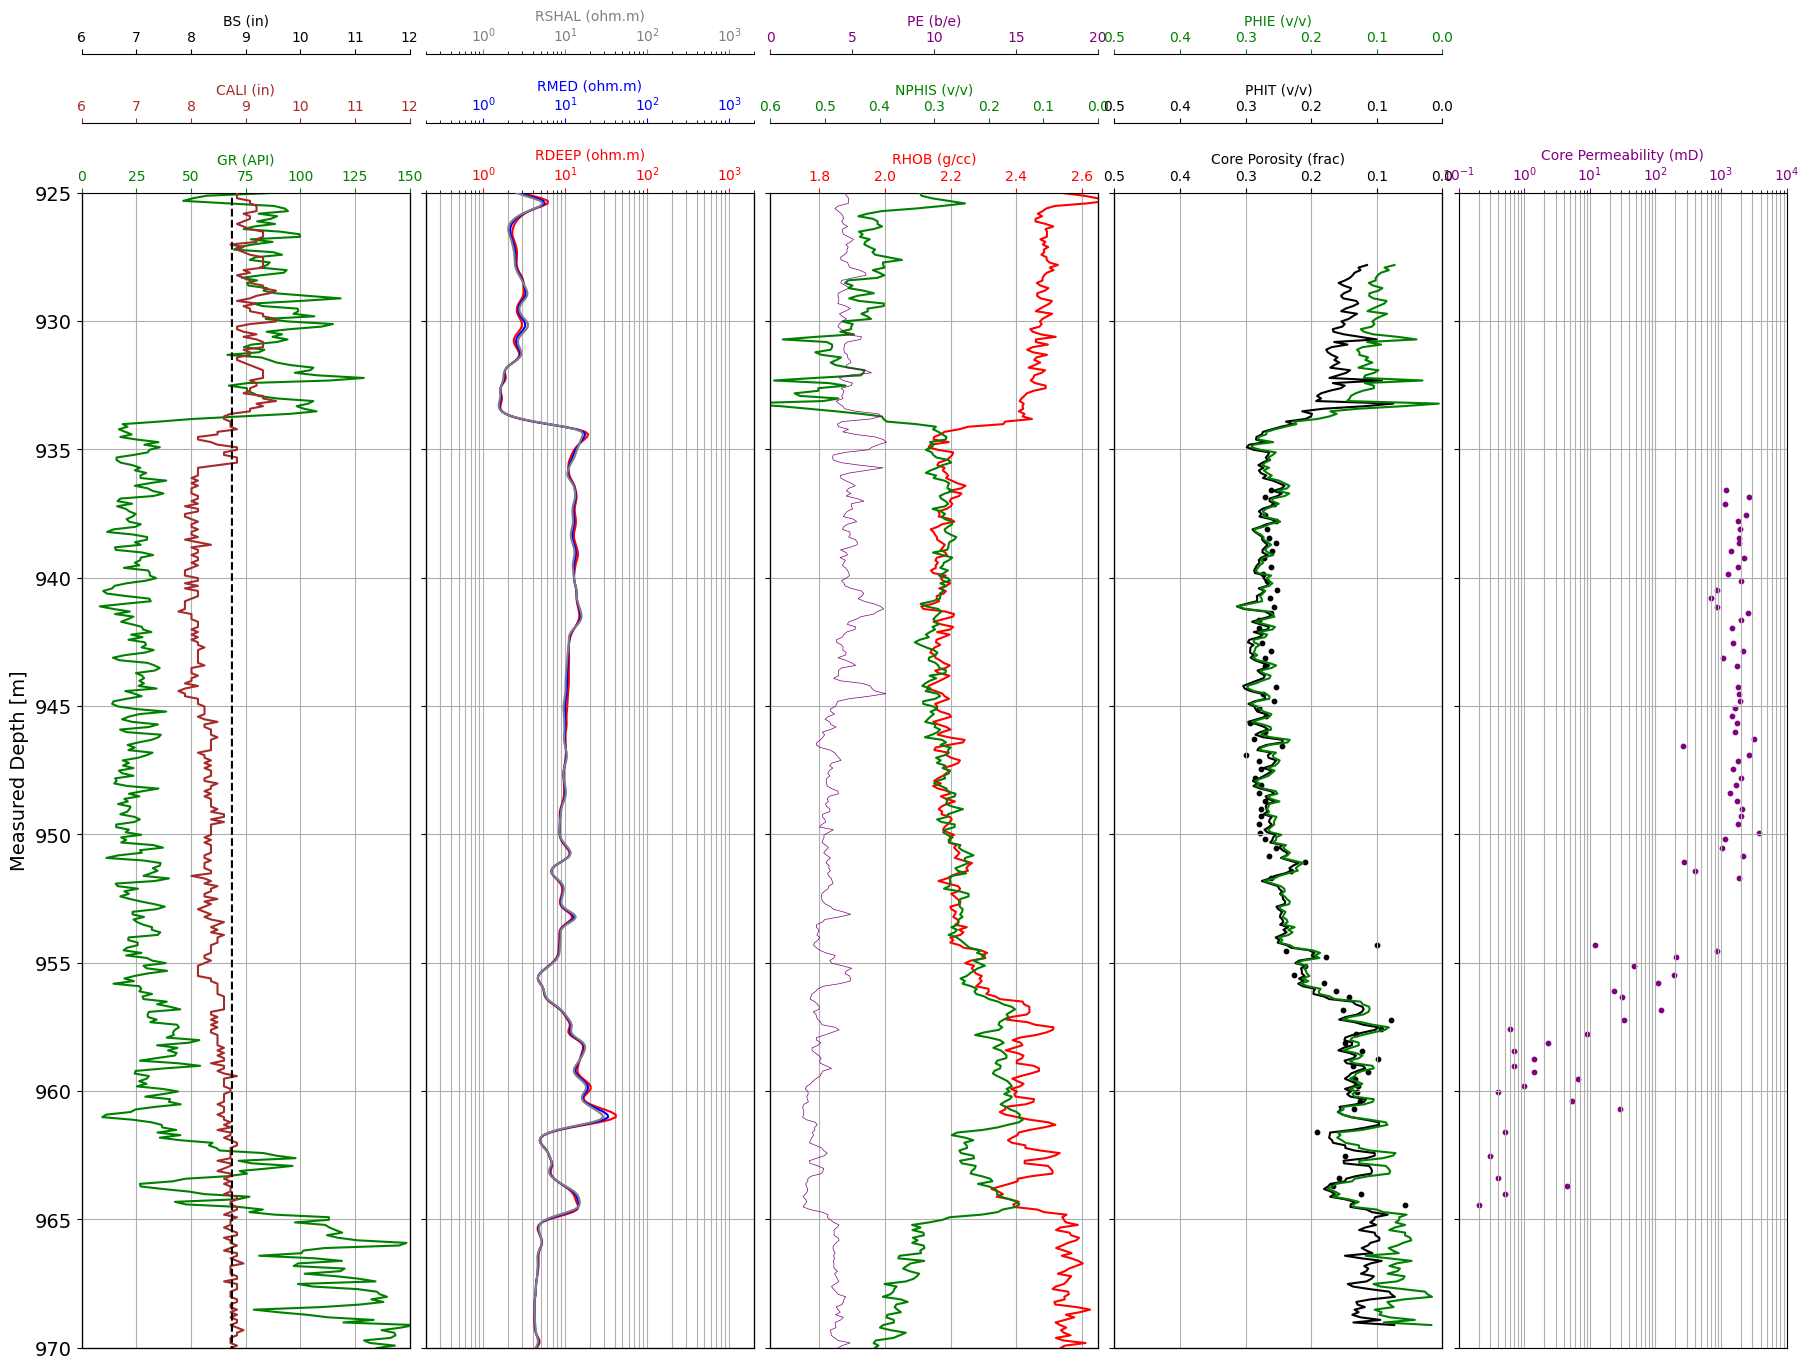

In [ ]:
fig, axes = plt.subplots(figsize=(22,15),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax11 = ax12.twiny()
ax14 = ax12.twiny()
ax13 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

ax12.scatter("Poro_Core","MD",data=core_3JND,color="black",s=10)
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax11.plot("PHIT","MD",data=registro_7JND,color="black")
ax11.set_xlim(0.5,0)
ax11.set_xlabel("PHIT (v/v)",color="black")
ax11.tick_params(axis="x",colors="black")

ax14.plot("PHIE","MD",data=registro_7JND,color="green")
ax14.set_xlim(0.5,0)
ax14.set_xlabel("PHIE (v/v)",color="green")
ax14.tick_params(axis="x",colors="green")

ax13.scatter("Kh_mD","MD",data=core_3JND,color="purple",s=10)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7 or i==10:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8 or i==11:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
registro_7JND_AG = registro_7JND[(934<=registro_7JND["MD"]) & (registro_7JND["MD"]<=964.7)]

In [ ]:
Well_3JND = pd.merge(core_3JND,registro_7JND_AG,how="outer",on="MD")
Well_3JND = Well_3JND.sort_values(by="MD")
Well_3JND.reset_index(inplace=True,drop=True)
Well_3JND.drop(["DIRECAO AMOSTRA","Gran_Density_g/cc","RSHAL","RMED"],inplace=True,axis=1)
Well_3JND

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,CALI,BS,GR,RDEEP,NPHIL,NPHIS,RHOB,PEF,DTC,DRHO,PHIE,PHIT
0,934.025,NaN,NaN,NaN,NaN,NaN,8.7238,8.75,18.7105,6.1250,0.2773,0.3328,2.361222,4.0957,320.0254,0.106322,0.2226,0.2276
1,934.125,NaN,NaN,NaN,NaN,NaN,8.7238,8.75,20.9973,9.5444,0.2442,0.2968,2.254498,4.1730,303.0471,0.086899,0.2397,0.2457
2,934.225,NaN,NaN,NaN,NaN,NaN,8.8428,8.75,17.0474,13.9481,0.2489,0.3020,2.225958,4.7709,294.3324,0.087011,0.2551,0.2594
3,934.325,NaN,NaN,NaN,NaN,NaN,8.4857,8.75,19.9579,17.6577,0.2401,0.2924,2.181540,4.4291,296.2393,0.062880,0.2681,0.2736
4,934.425,NaN,NaN,NaN,NaN,NaN,8.4857,8.75,22.8684,19.0740,0.2330,0.2847,2.169998,5.1863,302.7600,0.062494,0.2687,0.2753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,964.325,NaN,NaN,NaN,NaN,NaN,8.7238,8.75,42.6877,13.6904,0.1102,0.1478,2.408345,2.2360,252.7887,0.030337,0.1276,0.1333
380,964.425,NaN,NaN,NaN,NaN,NaN,8.7238,8.75,47.6772,14.1520,0.1069,0.1440,2.391771,2.1077,247.8674,0.001782,0.1360,0.1397
381,964.450,0.057,0.2,0.058818,0.060445,0.97307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,964.525,NaN,NaN,NaN,NaN,NaN,8.8428,8.75,72.0701,14.4565,0.1133,0.1513,2.394774,2.0122,241.1212,-0.000699,0.1351,0.1402


In [ ]:
GR = list(Well_3JND["GR"])
CALI = list(Well_3JND["CALI"])
BS = list(Well_3JND["BS"])
RDEEP = list(Well_3JND["RDEEP"])
DRHO = list(Well_3JND["DRHO"])
RHOB = list(Well_3JND["RHOB"])
NPHIL = list(Well_3JND["NPHIL"])
NPHIS = list(Well_3JND["NPHIS"])
PEF = list(Well_3JND["PEF"])
DTC = list(Well_3JND["DTC"])
PHIE = list(Well_3JND["PHIE"])
PHIT = list(Well_3JND["PHIT"])

In [ ]:
for i in range(0,len(GR)):
    if math.isnan(GR[i]):
        GR[i] = gmean([GR[i-1],GR[i+1]])
        if math.isnan(GR[i+1]):
            GR[i] = gmean([GR[i-1],GR[i+2]])

for i in range(0,len(CALI)):
    if math.isnan(CALI[i]):
        CALI[i] = gmean([CALI[i-1],CALI[i+1]])
        if math.isnan(CALI[i+1]):
            CALI[i] = gmean([CALI[i-1],CALI[i+2]])

for i in range(0,len(BS)):
    if math.isnan(BS[i]):
        BS[i] = gmean([BS[i-1],BS[i+1]])
        if math.isnan(BS[i+1]):
            BS[i] = gmean([BS[i-1],BS[i+2]])

for i in range(0,len(RDEEP)):
    if math.isnan(RDEEP[i]):
        RDEEP[i] = gmean([RDEEP[i-1],RDEEP[i+1]])
        if math.isnan(RDEEP[i+1]):
            RDEEP[i] = gmean([RDEEP[i-1],RDEEP[i+2]])

for i in range(0,len(RHOB)):
    if math.isnan(RHOB[i]):
        RHOB[i] = gmean([RHOB[i-1],RHOB[i+1]])
        if math.isnan(RHOB[i+1]):
            RHOB[i] = gmean([RHOB[i-1],RHOB[i+2]])

for i in range(0,len(NPHIL)):
    if math.isnan(NPHIL[i]):
        NPHIL[i] = gmean([NPHIL[i-1],NPHIL[i+1]])
        if math.isnan(NPHIL[i+1]):
            NPHIL[i] = gmean([NPHIL[i-1],NPHIL[i+2]])

for i in range(0,len(NPHIS)):
    if math.isnan(NPHIS[i]):
        NPHIS[i] = gmean([NPHIS[i-1],NPHIS[i+1]])
        if math.isnan(NPHIS[i+1]):
            NPHIS[i] = gmean([NPHIS[i-1],NPHIS[i+2]])

for i in range(0,len(PEF)):
    if math.isnan(PEF[i]):
        PEF[i] = gmean([PEF[i-1],PEF[i+1]])
        if math.isnan(PEF[i+1]):
            PEF[i] = gmean([PEF[i-1],PEF[i+2]])

for i in range(0,len(DTC)):
    if math.isnan(DTC[i]):
        DTC[i] = gmean([DTC[i-1],DTC[i+1]])
        if math.isnan(DTC[i+1]):
            DTC[i] = gmean([DTC[i-1],DTC[i+2]])

for i in range(0,len(DRHO)):
    if math.isnan(DRHO[i]):
        DRHO[i] = gmean([DRHO[i-1],DRHO[i+1]])
        if math.isnan(DRHO[i+1]):
            DRHO[i] = gmean([DRHO[i-1],DRHO[i+2]])

for i in range(0,len(PHIE)):
    if math.isnan(PHIE[i]):
        PHIE[i] = gmean([PHIE[i-1],PHIE[i+1]])
        if math.isnan(PHIE[i+1]):
            PHIE[i] = gmean([PHIE[i-1],PHIE[i+2]])

for i in range(0,len(PHIT)):
    if math.isnan(PHIT[i]):
        PHIT[i] = gmean([PHIT[i-1],PHIT[i+1]])
        if math.isnan(PHIT[i+1]):
            PHIT[i] = gmean([PHIT[i-1],PHIT[i+2]])

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:267: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


In [ ]:
Well_3JND["GR"] = GR
Well_3JND["CALI"] = CALI
Well_3JND["BS"] = BS
Well_3JND["RDEEP"] = RDEEP
Well_3JND["RHOB"] = RHOB
Well_3JND["NPHIL"] = NPHIL
Well_3JND["NPHIS"] = NPHIS
Well_3JND["PEF"] = PEF
Well_3JND["DTC"] = DTC
Well_3JND["DRHO"] = DRHO
Well_3JND["PHIE"] = PHIE
Well_3JND["PHIT"] = PHIT

In [ ]:
Well_3JND.isna().sum()

MD             0
Poro_Core    307
Kh_mD        307
RQI          307
Poro_norm    307
FZI          307
CALI           0
BS             0
GR             0
RDEEP          0
NPHIL          0
NPHIS          0
RHOB           0
PEF            0
DTC            0
DRHO           3
PHIE           0
PHIT           0
dtype: int64

In [ ]:
Well_3JND = Well_3JND.dropna()

In [ ]:
Well_3JND.reset_index(inplace=True,drop=True)
Well_3JND

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,CALI,BS,GR,RDEEP,NPHIL,NPHIS,RHOB,PEF,DTC,DRHO,PHIE,PHIT
0,936.60,0.262,1199.5,2.124610,0.355014,5.984587,8.009500,8.75,31.267249,13.374054,0.219999,0.270552,2.214523,4.715486,289.482268,0.040848,0.244036,0.251272
1,936.85,0.270,2664.3,3.119172,0.369863,8.433317,8.128500,8.75,24.092419,13.743639,0.236496,0.288497,2.214211,4.949289,291.328220,0.053217,0.249523,0.257377
2,937.15,0.257,1162.0,2.111379,0.345895,6.104103,8.008565,8.75,19.344267,13.255662,0.225837,0.276937,2.202945,4.948400,294.363098,0.048089,0.253913,0.259334
3,937.55,0.271,2374.7,2.939337,0.371742,7.906925,7.890400,8.75,24.000774,13.280930,0.231285,0.282886,2.165431,4.512783,293.409563,0.033574,0.271445,0.277245
4,937.80,0.254,1828.8,2.664378,0.340483,7.825300,8.068781,8.75,21.135448,13.492637,0.222862,0.273716,2.205488,5.171780,294.024724,0.062133,0.251612,0.257108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,961.60,0.191,0.5,0.050804,0.236094,0.215186,8.603926,8.75,38.707834,7.444891,0.186477,0.233651,2.424169,2.645596,254.703620,0.059155,0.139952,0.153862
70,962.55,0.149,0.3,0.044555,0.175088,0.254472,8.723800,8.75,93.308608,6.456263,0.180899,0.227599,2.503750,3.071763,274.582402,0.051514,0.082678,0.109407
71,963.40,0.158,0.4,0.049961,0.187648,0.266248,8.664045,8.75,56.271495,7.128380,0.160796,0.205148,2.426094,2.395874,265.033959,0.042164,0.122551,0.139151
72,963.70,0.167,4.4,0.161175,0.200480,0.803945,8.664045,8.75,26.817594,9.346413,0.165013,0.209819,2.364867,2.187138,257.474125,0.048346,0.164830,0.172491


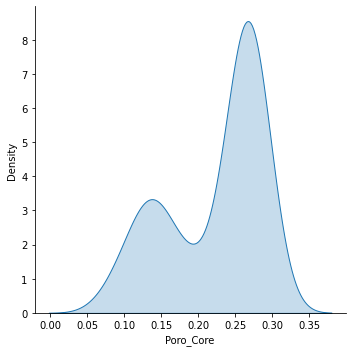

In [ ]:
sns.displot(data=Well_3JND,x=Well_3JND["Poro_Core"],kind="kde",fill=True)

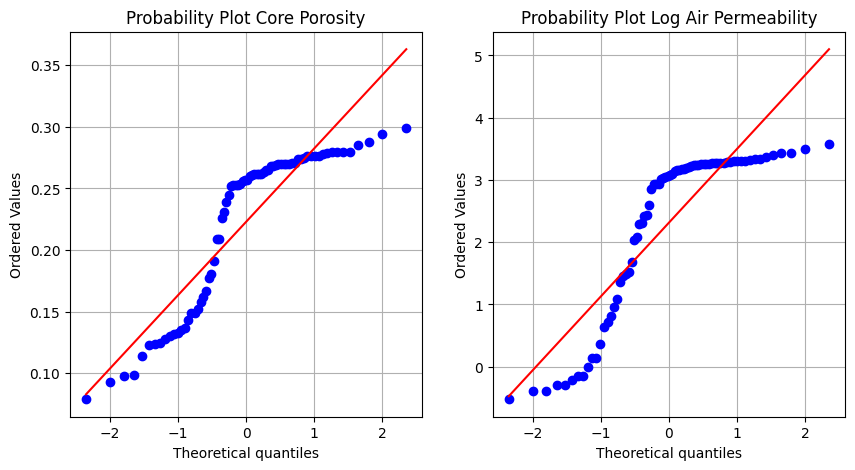

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(Well_3JND["Poro_Core"], dist="norm", plot=pylab)
plt.title("Probability Plot Core Porosity")
plt.subplot(1,2,1).grid()

plt.subplot(1,2,2)
stats.probplot(np.log10(Well_3JND["Kh_mD"]), dist="norm", plot=pylab)
plt.title("Probability Plot Log Air Permeability")
plt.subplot(1,2,2).grid()
pylab.show()

In [ ]:
X = Well_3JND[["Poro_Core"]]

In [ ]:
X2 = Well_3JND[["FZI"]]

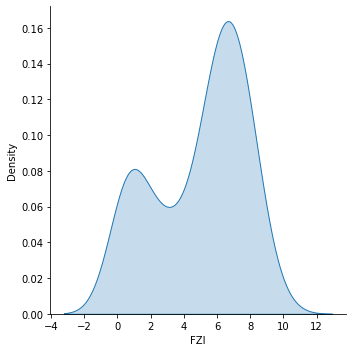

In [ ]:
sns.displot(data=Well_3JND,x=Well_3JND["FZI"],kind="kde",fill=True)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)
Well_3JND["Litotipos"] = kmeans_model.predict(X)

In [ ]:
Well_3JND.drop(["Gaussian"],axis=1,inplace=True)

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X)
Well_3JND["Gaussian"] = gmm.predict(X)

<ipython-input-117-f4ecf273f459>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Well_3JND["Gaussian"] = gmm.predict(X)


In [ ]:
Litotipos = {0:1,1:2}

In [ ]:
Well_3JND = Well_3JND.replace({"Gaussian":Litotipos})

In [ ]:
sns.displot(data=Well_3JND,x=Well_3JND["Poro_Core"],kind="kde",fill=True,hue="Gaussian_FZI",palette="tab10")

ValueError: ignored

In [ ]:
sns.displot(data=Well_3JND,x=Well_3JND["Poro_Core"],kind="kde",fill=True,hue="Gaussian",palette="tab10")

In [ ]:
sns.displot(data=Well_3JND,x=registro_7JND_AG["PHIE"],kind="kde",fill=True)

In [ ]:
# registro_7JND_AG.drop(["Gaussian"],axis=1,inplace=True)

In [ ]:
X_log = registro_7JND_AG[["PHIT"]]

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X_log)
registro_7JND_AG["Gaussian"] = gmm.predict(X_log)

In [ ]:
Litotipos = {0:2,1:1}

In [ ]:
registro_7JND_AG = registro_7JND_AG.replace({"Gaussian":Litotipos})

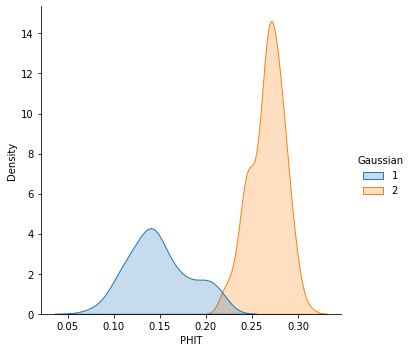

In [ ]:
sns.displot(data=registro_7JND_AG,x=registro_7JND_AG["PHIT"],kind="kde",fill=True,hue="Gaussian",palette="tab10")

KeyError: ignored

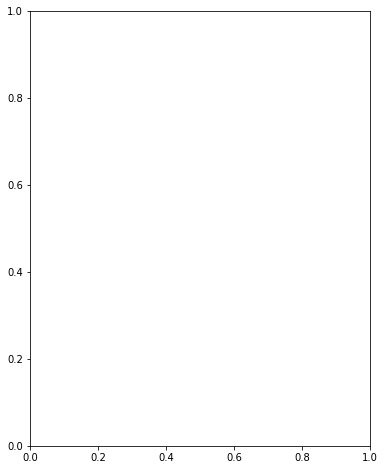

In [ ]:
plt.figure(figsize=(28,8))

plt.subplot(1,4,1)
sns.scatterplot(x=Well_3JND['NPHI'],y=Well_3JND['RHOB'],hue=Well_3JND["FZI"],size=Well_3JND["FZI"],palette="flare")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(1,4,1).grid()
plt.subplot(1,4,1).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,1).set_ylim(2.950,1.950)
plt.subplot(1,4,1).set_xlim(-0.05,0.45)

plt.subplot(1,4,2)
sns.scatterplot(x=Well_3JND['NPHI'],y=Well_3JND['RHOB'],hue=Well_3JND["Gaussian"],palette="tab10")
plt.subplot(1,4,2).grid()
plt.subplot(1,4,2).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,2).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,2).set_ylim(2.950,1.950)
plt.subplot(1,4,2).set_xlim(-0.05,0.45)
plt.subplot(1,4,2).set_title("Core")

plt.subplot(1,4,3)
sns.scatterplot(x=registro_7JND_AG['NPHI'],y=registro_7JND_AG['RHOB'],hue=registro_7JND_AG["Gaussian"],palette="tab10")
plt.subplot(1,4,3).grid()
plt.subplot(1,4,3).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,3).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,3).set_ylim(2.950,1.950)
plt.subplot(1,4,3).set_xlim(-0.05,0.45)
plt.subplot(1,4,3).set_title("Log")

plt.subplot(1,4,4)
sns.scatterplot(x=registro_7JND_AG['NPHI'],y=registro_7JND_AG['RHOB'],hue=registro_7JND_AG["GR"],palette="flare")
plt.subplot(1,4,4).grid()
plt.subplot(1,4,4).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,4).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,4).set_ylim(2.950,1.950)
plt.subplot(1,4,4).set_xlim(-0.05,0.45)
plt.subplot(1,4,4).set_title("Log")

In [ ]:
Well_3JND_lito1 = Well_3JND[(Well_3JND["Gaussian"]==1)]

KeyError: ignored

In [ ]:
Well_3JND_lito2 = Well_3JND[(Well_3JND["Gaussian"]==2)]

In [ ]:
Well_3JND_lito1.describe()

In [ ]:
Well_3JND_lito2.describe()

In [ ]:
sns.displot(data=Well_3JND_lito1["FZI"],kind="kde",fill=True,color="blue")

In [ ]:
sns.displot(data=Well_3JND_lito2["FZI"],kind="kde",fill=True,color="orange")

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=np.log10(Well_3JND["Poro_norm"]),y=np.log10(Well_3JND["RQI"]),hue=Well_3JND["Gaussian"],palette="tab10")
plt.subplot(1,2,1).set_title("7-JND-3D-BA",fontsize=16)
plt.subplot(1,2,1).set_xlabel("Log Porosidad Normalizada", fontsize=12, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("Log RQI", fontsize=12,fontweight="bold")
plt.subplot(1,2,1).set_ylim(-2,0.75)
plt.subplot(1,2,1).set_xlim(-2,0.75)
plt.subplot(1,2,1).grid()

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=Well_3JND["Poro_norm"],y=Well_3JND["RQI"])
plt.subplot(1,2,1).set_title("7-JND-3D-BA",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("RQI", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).semilogx()
plt.subplot(1,2,1).set_ylim(0.01,10)
plt.subplot(1,2,1).set_xlim(0.01,1)
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).grid(which="both")

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=Well_3JND["Poro_norm"],y=Well_3JND["RQI"],hue=Well_3JND["Gaussian"],palette="tab10")
plt.subplot(1,2,1).set_title("7-JND-3D-BA",fontsize=16)
plt.subplot(1,2,1).set_xlabel("Porosidad Normalizada", fontsize=12, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("RQI", fontsize=12,fontweight="bold")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).semilogx()
plt.subplot(1,2,1).set_ylim(0.01,10)
plt.subplot(1,2,1).set_xlim(0.01,1)
plt.subplot(1,2,1).grid(which="both")

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=Well_3JND['Poro_Core'],y=Well_3JND["Kh_mD"],hue=Well_3JND["Gaussian"],palette="tab10")
p.set_title("7-JND-3D-BA",fontsize=16)
p.set_xlabel("Core Porosity", fontsize=12, fontweight="bold")
p.set_ylabel("Kh [mD]", fontsize=12,fontweight="bold")
p.semilogy()
p.set_ylim(0.1,10000)
# p.set_ylim(2040,1920)
p.grid(which="major");

In [ ]:
fig, axes = plt.subplots(figsize=(35,12),sharey=True)

ax1 = plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax13 = ax4.twiny()
ax8 = plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax15 = ax12.twiny()
ax16 = plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [M]",color="black",fontsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,20000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax13.scatter("Kh_mD","MD",data=core_3JND,color="purple")
ax13.semilogx()
ax13.set_xlim(0.2,20000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(2,3)
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")
ax8.grid(which="major")

ax9.plot("NPHI","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="gray",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="gray")
ax10.tick_params(axis="x",colors="gray")
ax10.grid(which="both")

ax11.plot("DTC","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(393,131)
ax11.set_xlabel("DT (uS/m)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Poro_Core","MD",data=core_3JND,color="red")
ax12.set_xlabel("Core Porosity (frac)",color="red")
ax12.tick_params(axis="x",colors="red")
ax12.set_xlim(0,0.5)
ax12.grid(which="both")

ax15.plot("DPHS","MD",data=registro_7JND,linestyle="-",color="black",lw=0.5)
ax15.set_xlim(0,0.5)
ax15.set_xlabel("DPHS (frac)",color="black")
ax15.tick_params(axis="x",colors="black")


plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)
ax16 = sns.scatterplot(x=registro_7JND_AG["DPHS"],y=registro_7JND_AG["MD"],hue=registro_7JND_AG["Gaussian"],palette="tab10")
ax16.set_xlim(0,0.5)
ax16.set_xlabel("DPHS (frac)",color="black")
ax16.tick_params(axis="x",colors="black")

plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)
ax14 = sns.scatterplot(x=Well_3JND["FZI"],y=Well_3JND["MD"],hue=Well_3JND["Gaussian"],palette="tab10")
ax14.semilogx()
ax14.set_xlim(0.1,10)
ax14.grid(which="minor")
ax14.set_xlabel("FZI",color="black")
ax14.tick_params(axis="x",colors="black")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,930)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==5 or i==9 or i==4:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==6:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.07)

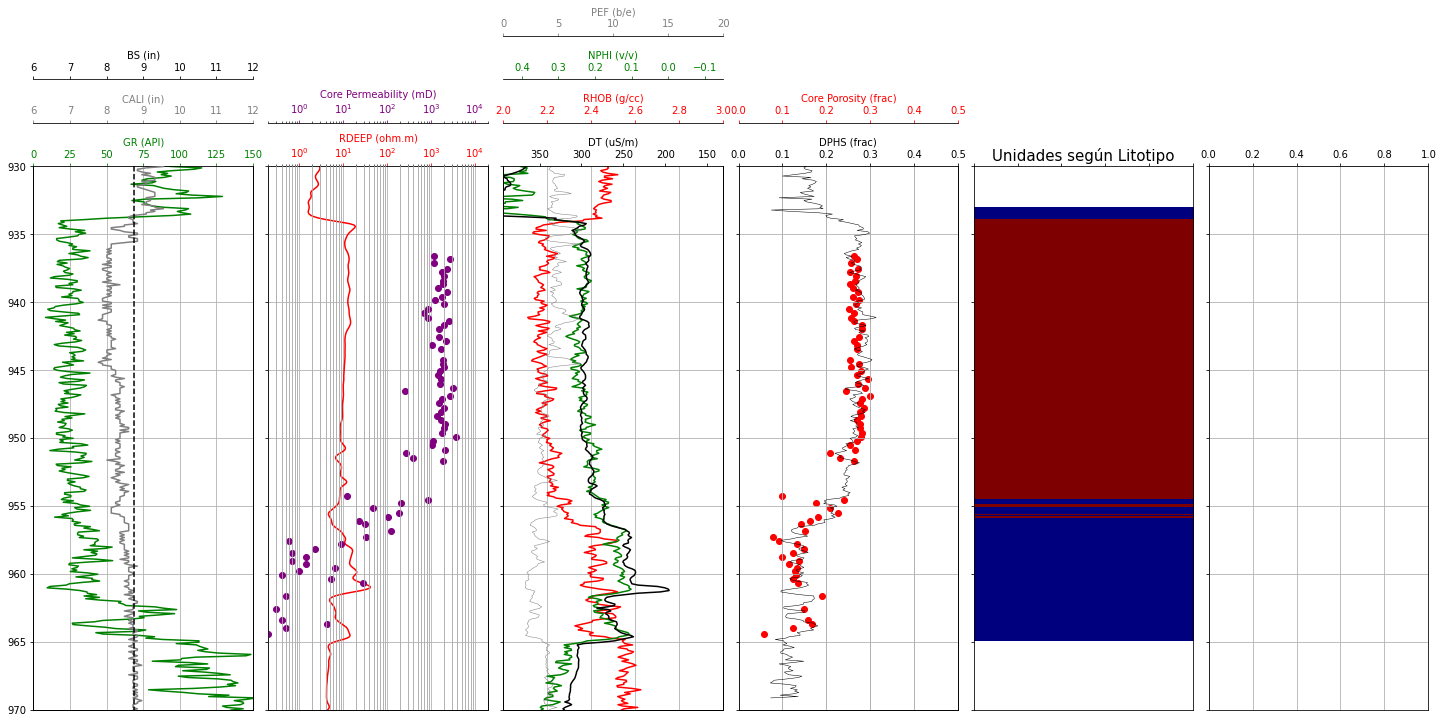

In [ ]:
fig, axes = plt.subplots(figsize=(25,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax13 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax15 = ax12.twiny()
ax16 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,20000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax13.scatter("Kh_mD","MD",data=core_3JND,color="purple")
ax13.semilogx()
ax13.set_xlim(0.2,20000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(2,3)
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")
ax8.grid(which="major")

ax9.plot("NPHIL","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")
# ax9.grid(which="both")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="gray",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="gray")
ax10.tick_params(axis="x",colors="gray")

ax11.plot("DTC","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(393,131)
ax11.set_xlabel("DT (uS/m)",color="black")
ax11.tick_params(axis="x",colors="black")
ax11.grid(which="both")

ax12.scatter("Poro_Core","MD",data=core_3JND,color="red")
ax12.set_xlabel("Core Porosity (frac)",color="red")
ax12.tick_params(axis="x",colors="red")
ax12.set_xlim(0,0.5)
ax12.grid(which="both")

ax15.plot("PHIT","MD",data=registro_7JND,linestyle="-",color="black",lw=0.5)
ax15.set_xlim(0,0.5)
ax15.set_xlabel("DPHS (frac)",color="black")
ax15.tick_params(axis="x",colors="black")

HFU = np.vstack(registro_7JND_AG['Gaussian'])
ax16.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="jet",vmin=1,vmax=2,
            interpolation="none")
ax16.set_title('Unidades según Litotipo', fontsize='15')
ax16.grid(which="both")

# plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)
# ax14 = sns.scatterplot(x=Well_3JND["FZI"],y=Well_3JND["MD"],hue=Well_3JND["Gaussian"],palette="tab10")
# ax14.semilogx()
# ax14.set_xlim(0.1,10)
# ax14.grid(which="minor")
# ax14.set_xlabel("FZI",color="black")
# ax14.tick_params(axis="x",colors="black")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,930)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==5 or i==9 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==6:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==7:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

for ax in [ax16]:
    plt.setp(ax.get_xticklabels(),visible=False)    

fig.subplots_adjust(wspace=0.07)

In [ ]:
corrMatrix = registro_7JND_AG.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrMatrix, cmap = 'jet', vmin=-1, vmax=1, annot = True)

In [ ]:
registro_7JND_AG_pp = registro_7JND_AG[["GR","PEF","RHOB","DTC","NPHI","DPHS","Gaussian"]]

In [ ]:
sns.pairplot(registro_7JND_AG_pp, hue = 'Gaussian', palette = 'tab10')

##ML

In [ ]:
X_GB_3JND = registro_7JND_AG[["GR","RHOB"]]
y_GB_3JND = registro_7JND_AG[["Gaussian"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_GB_3JND, y_GB_3JND, test_size = 0.2, random_state = 42)

###Random Forset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomClassifier = RandomForestClassifier(n_estimators=50,random_state=0,max_leaf_nodes=5,max_depth=4)
RandomClassifier.fit(X_GB_3JND,y_GB_3JND)

In [ ]:
y_pred_RF_3JND = RandomClassifier.predict(X_GB_3JND)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_GB_3JND,y_pred_RF_3JND)

In [ ]:
registro_7JND_AG["Predicted"] = y_pred_RF_3JND

In [ ]:
fig, axes = plt.subplots(figsize=(25,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax13 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax15 = ax12.twiny()
ax16 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("CALI","MD",data=registro_7JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,20000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax13.scatter("Kh_mD","MD",data=core_3JND,color="purple")
ax13.semilogx()
ax13.set_xlim(0.2,20000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(2,3)
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")
ax8.grid(which="major")

ax9.plot("NPHI","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")
# ax9.grid(which="both")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="gray",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PEF (b/e)",color="gray")
ax10.tick_params(axis="x",colors="gray")

ax11.plot("DTC","MD",data=registro_7JND,linestyle="-",color="black")
ax11.set_xlim(393,131)
ax11.set_xlabel("DT (uS/m)",color="black")
ax11.tick_params(axis="x",colors="black")
ax11.grid(which="both")

ax12.scatter("Poro_Core","MD",data=core_3JND,color="red")
ax12.set_xlabel("Core Porosity (frac)",color="red")
ax12.tick_params(axis="x",colors="red")
ax12.set_xlim(0,0.5)
ax12.grid(which="both")

ax15.plot("DPHS","MD",data=registro_7JND,linestyle="-",color="black",lw=0.5)
ax15.set_xlim(0,0.5)
ax15.set_xlabel("DPHS (frac)",color="black")
ax15.tick_params(axis="x",colors="black")

HFU = np.vstack(registro_7JND_AG['Predicted'])
ax16.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="jet",vmin=1,vmax=2,
            interpolation="none")
ax16.set_title('Prediction', fontsize='15')
ax16.grid(which="both")

plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)
ax14 = sns.scatterplot(x=Well_3JND["FZI"],y=Well_3JND["MD"],hue=Well_3JND["Gaussian"],palette="tab10")
ax14.semilogx()
ax14.set_xlim(0.1,10)
ax14.grid(which="minor")
ax14.set_xlabel("FZI",color="black")
ax14.tick_params(axis="x",colors="black")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,930)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==5 or i==9 or i==4:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==6:
        ax.spines["top"].set_position(("axes",1.16))
    elif i==7:
        ax.spines["top"].set_position(("axes",1.24))
    else:
        ax.grid()

for ax in [ax2,ax3,ax4,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

for ax in [ax16]:
    plt.setp(ax.get_xticklabels(),visible=False)    

fig.subplots_adjust(wspace=0.07)

###Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingClassifier(max_depth=3,n_estimators=120)
gbrt.fit(X_GB_3JND,y_GB_3JND)

errores = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]
mejor = np.argmin(errores)
mejor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=3,n_estimators=2,learning_rate=0.5)
xgb.fit(X_GB_3JND,y_GB_3JND)
y_pred_xgb = xgb.predict(X_GB_3JND)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_GB_3JND,y_pred_xgb)

In [ ]:
y_pred_xgb

In [ ]:
registro_7JND_AG["Predicted"] = y_pred_xgb

#7-JND-13D-BA

In [ ]:
core_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/Core 7-JND-13D-BA AG.xlsx"
core_13JND = pd.read_excel(core_13JND)

In [ ]:
core_13JND.describe()

,MD,Poro_Core,Gran_Density_g/cc,Kh_mD,RQI,Poro_norm,FZI
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,993.061842,0.169316,2.627105,185.202895,0.755997,0.208899,3.207579
std,5.504402,0.054651,0.026803,224.915627,0.534273,0.079326,1.715349
min,984.200000,0.068000,2.570000,0.060000,0.024202,0.072961,0.204433
25%,987.537500,0.126250,2.610000,24.000000,0.398549,0.144492,2.120379
50%,993.550000,0.173000,2.630000,70.500000,0.648583,0.209197,3.421413
75%,996.612500,0.211750,2.640000,296.000000,1.127883,0.268633,4.174256
max,1002.450000,0.270000,2.720000,848.000000,1.861436,0.369863,8.775343


In [ ]:
core_13JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DIRECAO AMOSTRA    38 non-null     object 
 1   MD                 38 non-null     float64
 2   Poro_Core          38 non-null     float64
 3   Gran_Density_g/cc  38 non-null     float64
 4   Kh_mD              38 non-null     float64
 5   RQI                38 non-null     float64
 6   Poro_norm          38 non-null     float64
 7   FZI                38 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.5+ KB


In [ ]:
registro_13JND = "/content/drive/MyDrive/UIS/ESP ING YAC/Monografía/Datos/Pozos Analisis/7-JND-13D-BA/7-JND-13D-BA.las"
registro_13JND = np.loadtxt(registro_13JND,skiprows=59)
registro_13JND[registro_13JND==-999.0000]=np.nan
registro_13JND = pd.DataFrame(registro_13JND,columns=["MD","BS","GR","CAL","RSHAL","RMED","RDEEP","NPHIL","RHOB","PEF","PHIE","PHIT","VCL"])

In [ ]:
registro_13JND["RHOB"]=registro_13JND["RHOB"]/1000

In [ ]:
registro_13JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MD      6885 non-null   float64
 1   BS      6885 non-null   float64
 2   GR      6885 non-null   float64
 3   CAL     6884 non-null   float64
 4   RSHAL   6884 non-null   float64
 5   RMED    6884 non-null   float64
 6   RDEEP   6884 non-null   float64
 7   NPHIL   6885 non-null   float64
 8   RHOB    6873 non-null   float64
 9   PEF     6873 non-null   float64
 10  PHIE    317 non-null    float64
 11  PHIT    317 non-null    float64
 12  VCL     549 non-null    float64
dtypes: float64(13)
memory usage: 699.4 KB


<ipython-input-27-da55c6cda5e6>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


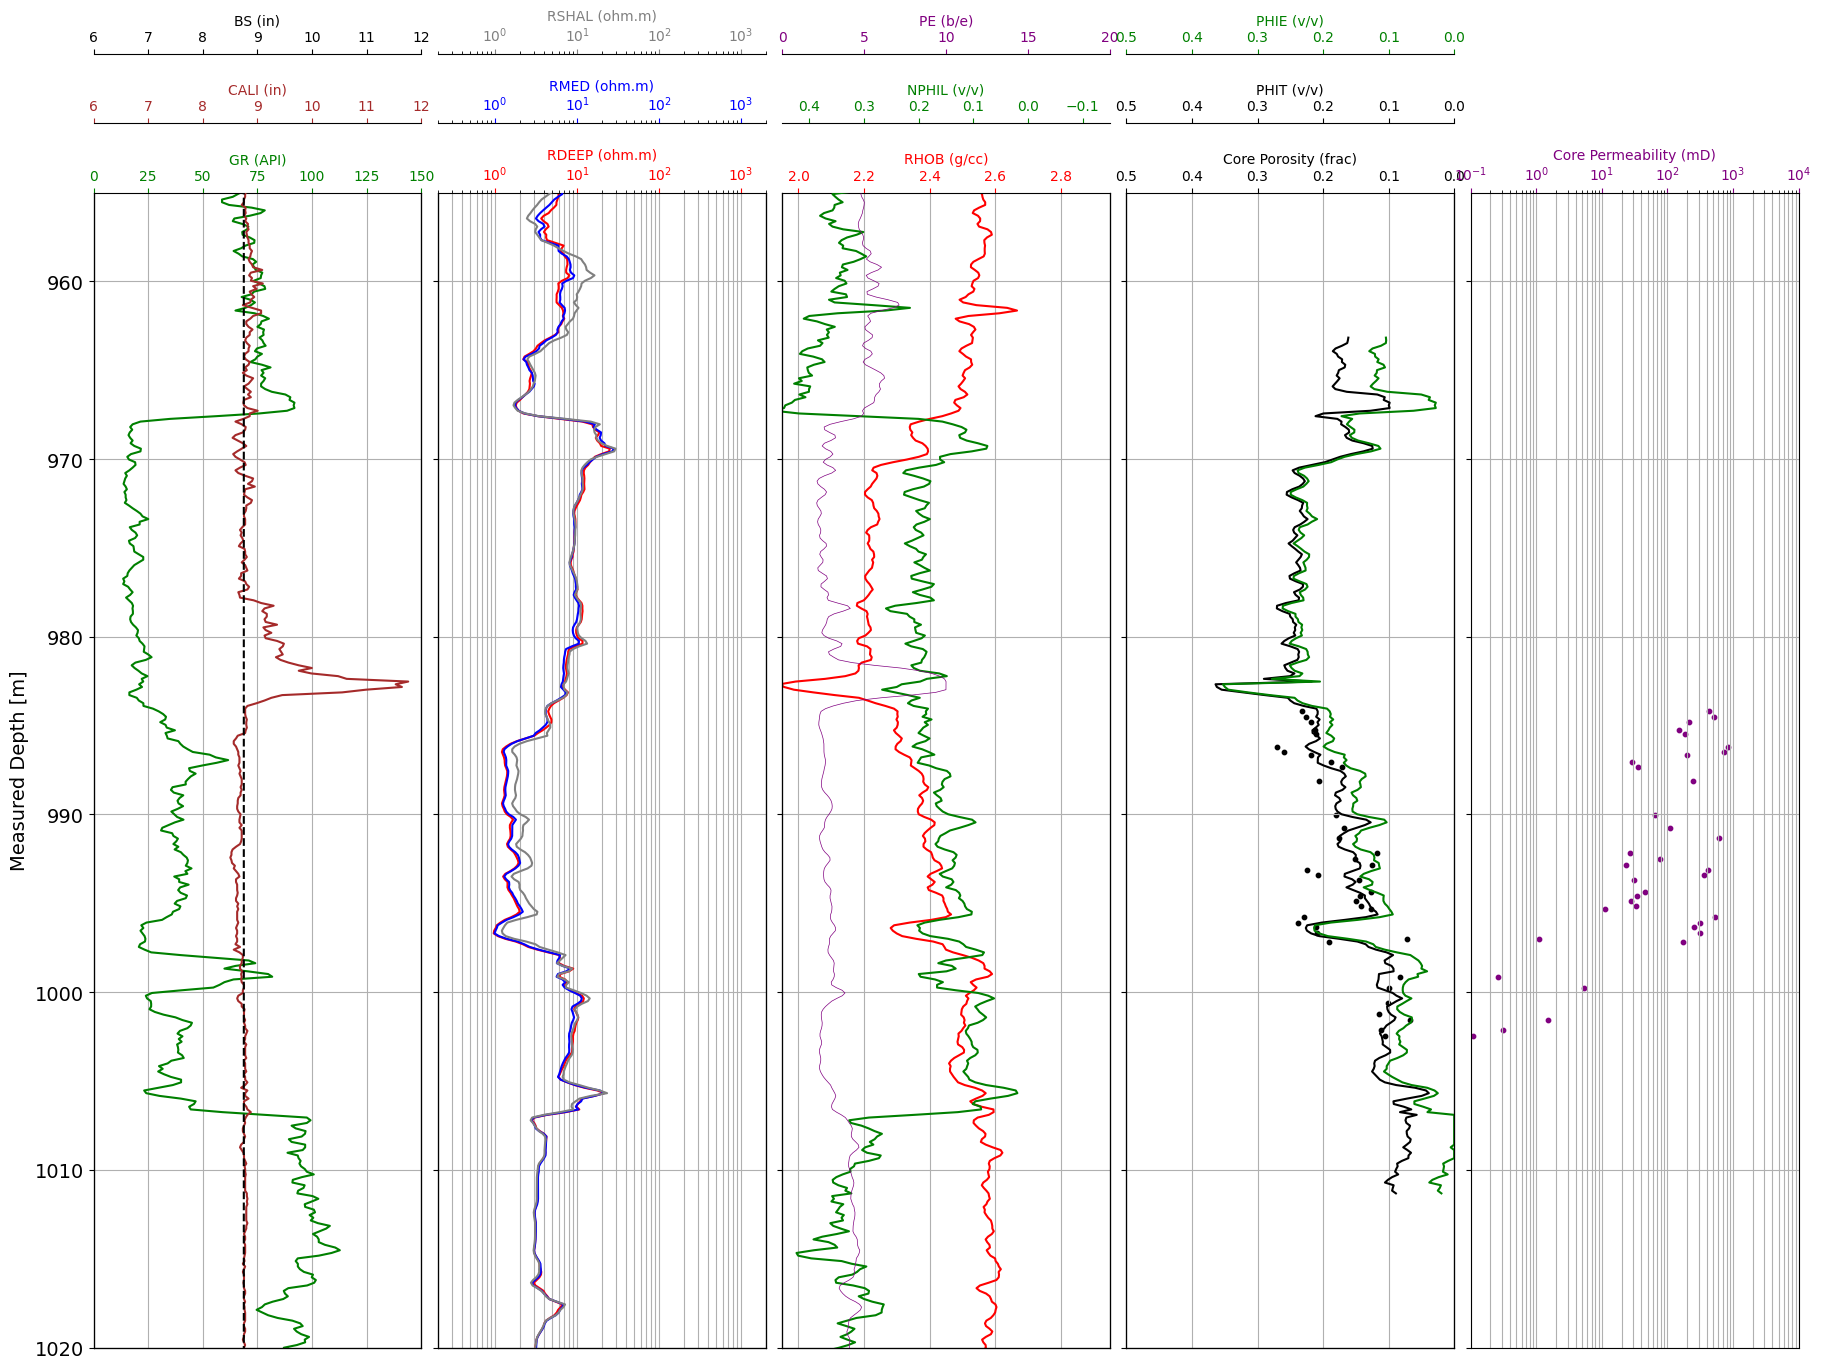

In [ ]:
fig, axes = plt.subplots(figsize=(22,15),sharey=True)

ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax11 = ax12.twiny()
ax14 = ax12.twiny()
ax13 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIL","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_13JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

ax12.scatter("Poro_Core","MD",data=core_13JND,color="black",s=10)
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax11.plot("PHIT","MD",data=registro_13JND,color="black")
ax11.set_xlim(0.5,0)
ax11.set_xlabel("PHIT (v/v)",color="black")
ax11.tick_params(axis="x",colors="black")

ax14.plot("PHIE","MD",data=registro_13JND,color="green")
ax14.set_xlim(0.5,0)
ax14.set_xlabel("PHIE (v/v)",color="green")
ax14.tick_params(axis="x",colors="green")

ax13.scatter("Kh_mD","MD",data=core_13JND,color="purple",s=10)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7 or i==10:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8 or i==11:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
registro_13JND_AG = registro_13JND[(967.7<=registro_13JND["MD"]) & (registro_13JND["MD"]<=1006.8)]

In [ ]:
registro_13JND_AG = registro_13JND_AG[(registro_13JND_AG["CAL"]<9)]

In [ ]:
Well_13JND = pd.merge(core_13JND,registro_13JND_AG,how="outer",on="MD")
Well_13JND = Well_13JND.sort_values(by="MD")
Well_13JND.reset_index(inplace=True,drop=True)
Well_13JND.drop(["DIRECAO AMOSTRA","Gran_Density_g/cc","RDEEP","RMED","RSHAL"],inplace=True,axis=1)
Well_13JND

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,BS,GR,CAL,NPHIL,RHOB,PEF,PHIE,PHIT,VCL
0,967.7400,NaN,NaN,NaN,NaN,NaN,8.75,35.0323,8.7430,0.2003,2.400259,4.3464,0.1556,0.1782,0.2459
1,967.8924,NaN,NaN,NaN,NaN,NaN,8.75,21.4741,8.5970,0.1567,2.368315,3.5922,0.1603,0.1719,0.1270
2,968.0448,NaN,NaN,NaN,NaN,NaN,8.75,17.8962,8.7117,0.1378,2.342189,2.9278,0.1637,0.1725,0.0956
3,968.1972,NaN,NaN,NaN,NaN,NaN,8.75,16.7654,8.7848,0.1216,2.339318,2.5657,0.1581,0.1660,0.0857
4,968.3496,NaN,NaN,NaN,NaN,NaN,8.75,17.7069,8.7743,0.1126,2.341026,2.5960,0.1522,0.1608,0.0939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1006.1448,NaN,NaN,NaN,NaN,NaN,8.75,46.7125,8.7535,0.0964,2.523921,3.1304,0.0608,0.0927,0.3360
254,1006.2972,NaN,NaN,NaN,NaN,NaN,8.75,45.9587,8.7535,0.1011,2.533210,3.0429,0.0608,0.0922,0.3417
255,1006.4496,NaN,NaN,NaN,NaN,NaN,8.75,43.7268,8.7952,0.0867,2.558477,3.0128,0.0474,0.0769,0.3222
256,1006.6020,NaN,NaN,NaN,NaN,NaN,8.75,44.4800,8.8161,0.0857,2.594650,3.0693,0.0354,0.0655,0.3288


In [ ]:
GR = list(Well_13JND["GR"])
BS = list(Well_13JND["BS"])
CAL = list(Well_13JND["CAL"])
RHOB = list(Well_13JND["RHOB"])
NPHIL = list(Well_13JND["NPHIL"])
VCL = list(Well_13JND["VCL"])
PEF = list(Well_13JND["PEF"])
PHIE = list(Well_13JND["PHIE"])
PHIT = list(Well_13JND["PHIT"])

In [ ]:
for i in range(0,len(GR)):
    if math.isnan(GR[i]):
        GR[i] = gmean([GR[i-1],GR[i+1]])
        if math.isnan(GR[i+1]):
            GR[i] = gmean([GR[i-1],GR[i+2]])

for i in range(0,len(BS)):
    if math.isnan(BS[i]):
        BS[i] = gmean([BS[i-1],BS[i+1]])
        if math.isnan(BS[i+1]):
            BS[i] = gmean([BS[i-1],BS[i+2]])

for i in range(0,len(CAL)):
    if math.isnan(CAL[i]):
        CAL[i] = gmean([CAL[i-1],CAL[i+1]])
        if math.isnan(CAL[i+1]):
            CAL[i] = gmean([CAL[i-1],CAL[i+2]])

for i in range(0,len(RHOB)):
    if math.isnan(RHOB[i]):
        RHOB[i] = gmean([RHOB[i-1],RHOB[i+1]])
        if math.isnan(RHOB[i+1]):
            RHOB[i] = gmean([RHOB[i-1],RHOB[i+2]])

for i in range(0,len(NPHIL)):
    if math.isnan(NPHIL[i]):
        NPHIL[i] = gmean([NPHIL[i-1],NPHIL[i+1]])
        if math.isnan(NPHIL[i+1]):
            NPHIL[i] = gmean([NPHIL[i-1],NPHIL[i+2]])

for i in range(0,len(PEF)):
    if math.isnan(PEF[i]):
        PEF[i] = gmean([PEF[i-1],PEF[i+1]])
        if math.isnan(PEF[i+1]):
            PEF[i] = gmean([PEF[i-1],PEF[i+2]])

for i in range(0,len(PHIE)):
    if math.isnan(PHIE[i]):
        PHIE[i] = gmean([PHIE[i-1],PHIE[i+1]])
        if math.isnan(PHIE[i+1]):
            PHIE[i] = gmean([PHIE[i-1],PHIE[i+2]])

for i in range(0,len(PHIT)):
    if math.isnan(PHIT[i]):
        PHIT[i] = gmean([PHIT[i-1],PHIT[i+1]])
        if math.isnan(PHIT[i+1]):
            PHIT[i] = gmean([PHIT[i-1],PHIT[i+2]])  

for i in range(0,len(VCL)):
    if math.isnan(VCL[i]):
        VCL[i] = gmean([VCL[i-1],VCL[i+1]])
        if math.isnan(VCL[i+1]):
            VCL[i] = gmean([VCL[i-1],VCL[i+2]])  

In [ ]:
Well_13JND["GR"] = GR
Well_13JND["BS"] = BS
Well_13JND["CAL"] = CAL
Well_13JND["RHOB"] = RHOB
Well_13JND["NPHIL"] = NPHIL
Well_13JND["PEF"] = PEF
Well_13JND["PHIE"] = PHIE
Well_13JND["PHIT"] = PHIT
Well_13JND["VCL"] = VCL

In [ ]:
Well_13JND.isna().sum()

MD             0
Poro_Core    220
Kh_mD        220
RQI          220
Poro_norm    220
FZI          220
BS             0
GR             0
CAL            0
NPHIL          0
RHOB           0
PEF            0
PHIE           0
PHIT           0
VCL            0
dtype: int64

In [ ]:
Well_13JND = Well_13JND.dropna()

In [ ]:
Well_13JND.reset_index(inplace=True,drop=True)
Well_13JND

,MD,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,BS,GR,CAL,NPHIL,RHOB,PEF,PHIE,PHIT,VCL
0,984.20,0.232,425.00,1.343941,0.302083,4.448907,8.75,30.801371,8.774300,0.186600,2.301828,2.345862,0.189098,0.208250,0.208710
1,984.50,0.226,513.00,1.496009,0.291990,5.123499,8.75,32.485814,8.779548,0.189570,2.302094,2.298054,0.188899,0.209447,0.223525
2,984.80,0.219,215.00,0.983845,0.280410,3.508599,8.75,31.623989,8.800398,0.182643,2.300997,2.255469,0.187033,0.206893,0.215973
3,985.25,0.212,150.00,0.835232,0.269036,3.104543,8.75,35.312317,8.795194,0.193589,2.295374,2.310324,0.190897,0.213684,0.248252
4,985.50,0.211,184.00,0.927251,0.267427,3.467304,8.75,33.221007,8.706236,0.195439,2.301671,2.428034,0.191262,0.212420,0.230035
5,986.20,0.270,848.00,1.759729,0.369863,4.757785,8.75,42.086887,8.617844,0.202309,2.296214,2.555549,0.195921,0.224186,0.300694
6,986.50,0.259,725.00,1.661303,0.349528,4.752993,8.75,49.109559,8.649100,0.176472,2.314193,2.564085,0.174626,0.208747,0.265056
7,986.65,0.219,199.00,0.946529,0.280410,3.375523,8.75,54.508929,8.659544,0.183000,2.330628,2.592030,0.167699,0.205942,0.319699
8,987.05,0.188,29.00,0.389987,0.231527,1.684410,8.75,58.899330,8.670000,0.200294,2.344284,2.645348,0.166336,0.208150,0.426462
9,987.35,0.171,36.00,0.455599,0.206273,2.208723,8.75,46.618226,8.659544,0.174331,2.348676,2.600710,0.161417,0.193316,0.324020


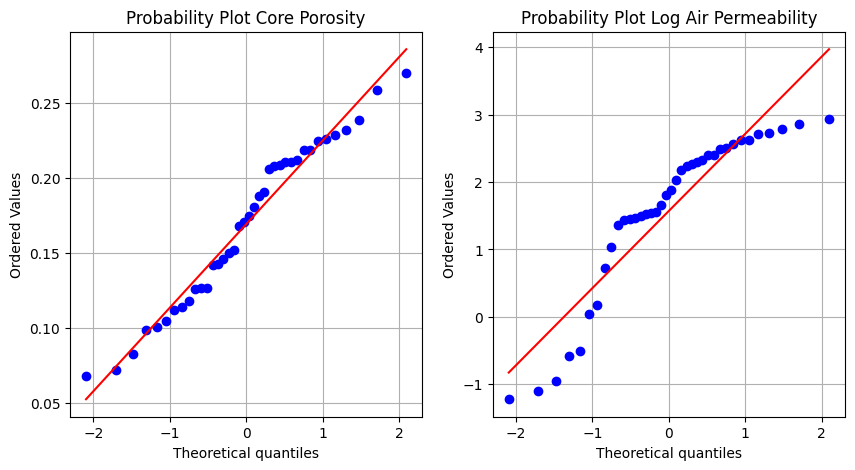

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
stats.probplot(Well_13JND["Poro_Core"], dist="norm", plot=pylab)
plt.title("Probability Plot Core Porosity")
plt.subplot(1,2,1).grid()

plt.subplot(1,2,2)
stats.probplot(np.log10(Well_13JND["Kh_mD"]), dist="norm", plot=pylab)
plt.title("Probability Plot Log Air Permeability")
plt.subplot(1,2,2).grid()
pylab.show()

In [ ]:
sns.displot(data=Well_13JND,x=Well_13JND["Poro_Core"],kind="kde",fill=True)

In [ ]:
X_13JND = Well_13JND[["Poro_Core"]]

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X_13JND)
Well_13JND["Gaussian"] = gmm.predict(X_13JND)

In [ ]:
Lithotypes_13JND = {0:1,1:2}

In [ ]:
Well_13JND = Well_13JND.replace({"Gaussian":Lithotypes_13JND})

In [ ]:
sns.displot(data=Well_13JND,x=Well_13JND["Poro_Core"],kind="kde",fill=True,hue="Gaussian",palette="tab10")

In [ ]:
sns.displot(data=registro_13JND_AG,x=registro_13JND_AG["DPHZ"],kind="kde",fill=True)

In [ ]:
# registro_13JND_AG.drop(["Gaussian"],axis=1,inplace=True)

In [ ]:
X_13JND_log = registro_13JND_AG[["DPHZ"]]

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X_13JND_log)
registro_13JND_AG["Gaussian"] = gmm.predict(X_13JND_log)

In [ ]:
Lithotypes_13JND_log = {0:2,1:1}

In [ ]:
registro_13JND_AG = registro_13JND_AG.replace({"Gaussian":Lithotypes_13JND_log})

In [ ]:
sns.displot(data=registro_13JND_AG,x=registro_13JND_AG["DPHZ"],kind="kde",fill=True,hue="Gaussian",palette="tab10")

In [ ]:
plt.figure(figsize=(28,8))

plt.subplot(1,4,1)
sns.scatterplot(x=Well_13JND['NPHI'],y=Well_13JND['RHOB'],hue=Well_13JND["FZI"],size=Well_13JND["FZI"],palette="flare")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(1,4,1).grid()
plt.subplot(1,4,1).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,1).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,1).set_ylim(2.950,1.950)
plt.subplot(1,4,1).set_xlim(-0.05,0.45)

plt.subplot(1,4,2)
sns.scatterplot(x=Well_13JND['NPHI'],y=Well_13JND['RHOB'],hue=Well_13JND["Gaussian"],palette="tab10")
plt.subplot(1,4,2).grid()
plt.subplot(1,4,2).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,2).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,2).set_ylim(2.950,1.950)
plt.subplot(1,4,2).set_xlim(-0.05,0.45)
plt.subplot(1,4,2).set_title("Core")

plt.subplot(1,4,3)
sns.scatterplot(x=registro_13JND_AG['NPHI'],y=registro_13JND_AG['RHOB'],hue=registro_13JND_AG["Gaussian"],palette="tab10")
plt.subplot(1,4,3).grid()
plt.subplot(1,4,3).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,3).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,3).set_ylim(2.950,1.950)
plt.subplot(1,4,3).set_xlim(-0.05,0.45)
plt.subplot(1,4,3).set_title("Log")

plt.subplot(1,4,4)
sns.scatterplot(x=registro_13JND_AG['NPHI'],y=registro_13JND_AG['RHOB'],hue=registro_13JND_AG["GR"],palette="flare")
plt.subplot(1,4,4).grid()
plt.subplot(1,4,4).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,4).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,4).set_ylim(2.950,1.950)
plt.subplot(1,4,4).set_xlim(-0.05,0.45)
plt.subplot(1,4,4).set_title("Log")

In [ ]:
sns.displot(data=Well_13JND,x=Well_13JND["FZI"],kind="kde",fill=True,hue="Gaussian",palette="tab10")

In [ ]:
sns.displot(data=Well_13JND,x=Well_13JND["FZI"],kind="kde",fill=True,palette="tab10")

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=np.log10(Well_13JND["Poro_norm"]),y=np.log10(Well_13JND["RQI"]),hue=Well_13JND["Gaussian"],palette="tab10")
plt.subplot(1,2,1).set_title("7-JND-13D-BA",fontsize=16)
plt.subplot(1,2,1).set_xlabel("Log Porosidad Normalizada", fontsize=12, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("Log RQI", fontsize=12,fontweight="bold")
plt.subplot(1,2,1).set_ylim(-2,0.75)
plt.subplot(1,2,1).set_xlim(-2,0.75)
plt.subplot(1,2,1).grid()

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x=Well_13JND["Poro_norm"],y=Well_13JND["RQI"])
plt.subplot(1,2,1).set_title("7-JND-13D-BA",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("RQI", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).semilogx()
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).set_ylim(0.01,10)
plt.subplot(1,2,1).set_xlim(0.01,1)
plt.subplot(1,2,1).grid(which="both")

In [ ]:
plt.figure(figsize=(28,8))

plt.subplot(1,4,1)
sns.scatterplot(x=Well_3JND['NPHI'],y=Well_3JND['RHOB'],hue=Well_3JND["FZI"],size=Well_3JND["FZI"],palette="flare")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(1,4,1).grid()
plt.subplot(1,4,1).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,1).set_ylim(2.950,1.950)
plt.subplot(1,4,1).set_xlim(-0.05,0.45)
plt.subplot(1,4,1).set_title("Core 7-JND-3D-BA")

plt.subplot(1,4,2)
sns.scatterplot(x=Well_13JND['NPHI'],y=Well_13JND['RHOB'],hue=Well_13JND["FZI"],size=Well_13JND["FZI"],palette="flare")
plt.subplot(1,4,2).grid()
plt.subplot(1,4,2).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,2).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,2).set_ylim(2.950,1.950)
plt.subplot(1,4,2).set_xlim(-0.05,0.45)
plt.subplot(1,4,2).set_title("Core 7-JND-13D-BA")

plt.subplot(1,4,3)
sns.scatterplot(x=registro_7JND_AG['NPHI'],y=registro_7JND_AG['RHOB'],hue=registro_7JND_AG["Gaussian"],palette="tab10")
plt.subplot(1,4,3).grid()
plt.subplot(1,4,3).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,3).set_ylabel("RHOB", fontsize=12)
plt.subplot(1,4,3).set_ylim(2.950,1.950)
plt.subplot(1,4,3).set_xlim(-0.05,0.45)
plt.subplot(1,4,3).set_title("Log 7-JND-3D-BA")

plt.subplot(1,4,4)
sns.scatterplot(x=registro_13JND_AG['NPHI'],y=registro_13JND_AG['RHOB'],hue=registro_13JND_AG["Gaussian"],palette="tab10")
plt.subplot(1,4,4).grid()
plt.subplot(1,4,4).set_xlabel("NPHI", fontsize=12)
plt.subplot(1,4,4).set_ylabel("RHOZ", fontsize=12)
plt.subplot(1,4,4).set_ylim(2.950,1.950)
plt.subplot(1,4,4).set_xlim(-0.05,0.45)
plt.subplot(1,4,4).set_title("Log 7-JND-13D-BA");

In [ ]:
fig, axes = plt.subplots(figsize=(22,15),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax7 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax11 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")

ax2.plot("HCAL","MD",data=registro_13JND,color="gray")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="gray")
ax2.tick_params(axis="x",colors="gray")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("AHT90","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("AHT90 (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("AHT60","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.set_xlabel("AHT60 (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("AHT30","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.set_xlabel("AHT30 (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax7.plot("AHT20","MD",data=registro_13JND,color="black")
ax7.set_xlim(0.2,200)
ax7.semilogx()
ax7.set_xlabel("AHT20 (ohm.m)",color="black")
ax7.tick_params(axis="x",colors="black")

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHI","MD",data=registro_13JND,color="blue")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="blue")
ax9.tick_params(axis="x",colors="blue")

ax10.plot("PEFZ","MD",data=registro_13JND,linestyle="-",color="black")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEFZ (b/e)",color="black")
ax10.tick_params(axis="x",colors="black")

ax11.scatter("Poro_Core","MD",data=core_13JND,color="black")
ax11.set_xlabel("Core Porosity (%)",color="black")
ax11.tick_params(axis="x",colors="black")

ax12.scatter("Kh_mD","MD",data=core_13JND,color="purple")
ax12.semilogx()
ax12.set_xlim(0.01,1000)
ax12.grid(which="minor")
ax12.set_xlabel("Core Permeability (mD)",color="purple")
ax12.tick_params(axis="x",colors="purple")

ax13 = sns.scatterplot(x=Well_13JND["FZI"],y=Well_13JND["MD"],hue=Well_13JND["Gaussian"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10)
ax13.grid(which="minor")
ax13.set_xlabel("FZI",color="black")
ax13.tick_params(axis="x",colors="black")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1030,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==8:
        ax.spines["top"].set_position(("axes",1.05))
    elif i==2 or i==5 or i==9:
        ax.spines["top"].set_position(("axes",1.10))
    elif i==6:
        ax.spines["top"].set_position(("axes",1.15))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##ML

###Random Forest

In [ ]:
X_13JND_ML = registro_13JND_AG[["GR","RHOB"]]

In [ ]:
y_pred_RF_13JND = RandomClassifier.predict(X_13JND_ML)

In [ ]:
y_pred_xgb_13D = xgb.predict(X_13JND_ML)

In [ ]:
registro_13JND_AG["Predicted"]=y_pred_RF_13JND

#Jandaia

In [ ]:
Well_3JND["Well"]="3D"

<ipython-input-91-17ec1e34cde7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Well_3JND["Well"]="3D"


In [ ]:
Well_13JND["Well"]="13D"

<ipython-input-92-4bd162d0dc88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Well_13JND["Well"]="13D"


In [ ]:
AguaGrande = pd.concat([Well_3JND,Well_13JND])
AguaGrande.drop(columns=["MD","BS","DTC","DRHO","PHIE","PHIT","CAL","VCL","CALI","NPHIS","RDEEP"],inplace=True,axis=1)
AguaGrande.reset_index(inplace=True,drop=True)

In [ ]:
AguaGrande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Poro_Core  112 non-null    float64
 1   Kh_mD      112 non-null    float64
 2   RQI        112 non-null    float64
 3   Poro_norm  112 non-null    float64
 4   FZI        112 non-null    float64
 5   GR         112 non-null    float64
 6   NPHIL      112 non-null    float64
 7   RHOB       112 non-null    float64
 8   PEF        112 non-null    float64
 9   Well       112 non-null    object 
dtypes: float64(9), object(1)
memory usage: 8.9+ KB


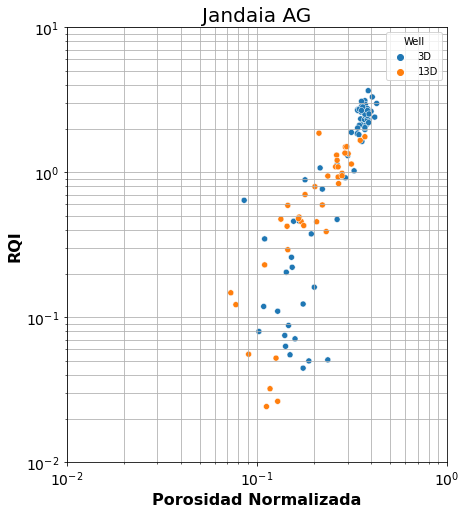

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x=AguaGrande["Poro_norm"],y=AguaGrande["RQI"],hue=AguaGrande["Well"],palette="tab10")
plt.subplot(1,2,1).set_title("Jandaia AG",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("RQI", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).semilogx()
plt.subplot(1,2,1).set_ylim(0.01,10)
plt.subplot(1,2,1).set_xlim(0.01,1)
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).grid(which="both")

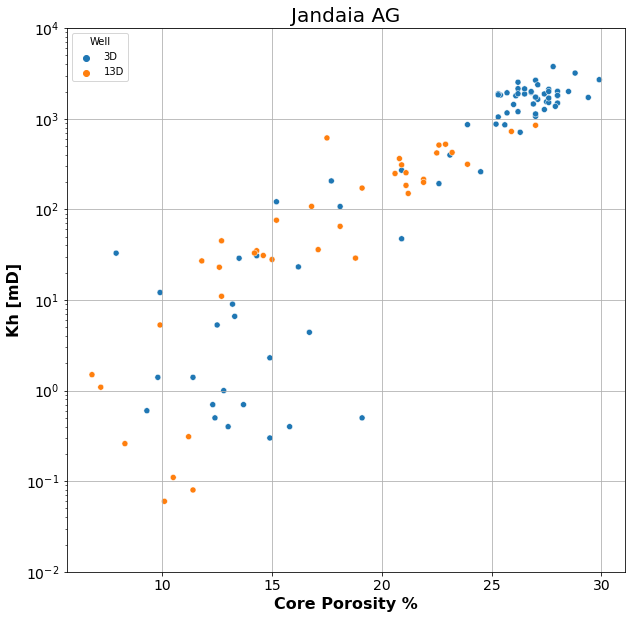

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.scatterplot(x=AguaGrande['Poro_Core']*100,y=AguaGrande["Kh_mD"],hue=AguaGrande["Well"])
p.set_title("Jandaia AG",fontsize=20)
p.set_xlabel("Core Porosity %", fontsize=16, fontweight="bold")
p.set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
p.set_yscale(value="log")
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_ylim(0.01,10000)
# p.set_ylim(2040,1920)
p.grid(which="major");

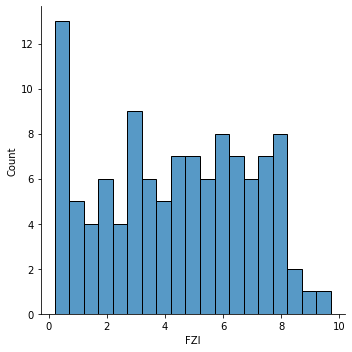

In [ ]:
sns.displot(data=AguaGrande,x=AguaGrande["FZI"],binwidth=0.5)

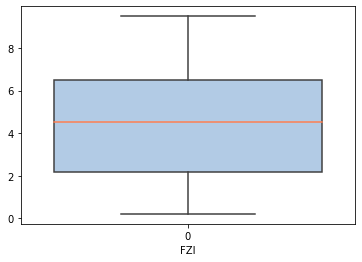

In [ ]:
sns.boxplot(AguaGrande["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI");

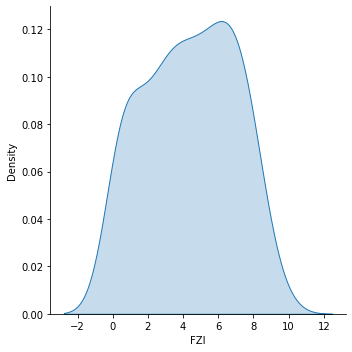

In [ ]:
sns.displot(data=AguaGrande,x=AguaGrande["FZI"],kind="kde",fill=True)

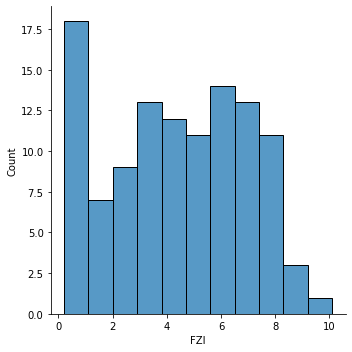

In [ ]:
sns.displot(data=AguaGrande,x=AguaGrande["FZI"],binwidth=0.9)

##Unidades

In [ ]:
AguaGrande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Poro_Core  112 non-null    float64
 1   Kh_mD      112 non-null    float64
 2   RQI        112 non-null    float64
 3   Poro_norm  112 non-null    float64
 4   FZI        112 non-null    float64
 5   GR         112 non-null    float64
 6   NPHIL      112 non-null    float64
 7   RHOB       112 non-null    float64
 8   PEF        112 non-null    float64
 9   Well       112 non-null    object 
dtypes: float64(9), object(1)
memory usage: 8.9+ KB


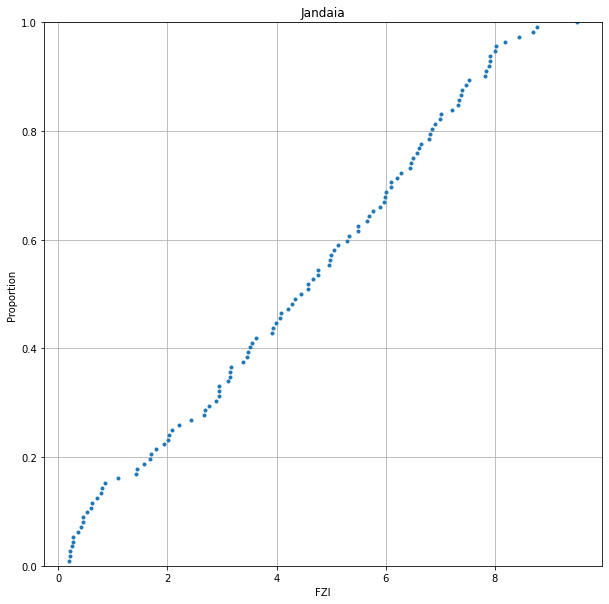

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.ecdfplot(data=AguaGrande, x="FZI",marker=".",linestyle="none")
p.set_title("Jandaia")
p.grid();

In [ ]:
XJAN = AguaGrande[["FZI"]]

In [ ]:
X = XJAN

In [ ]:
XJAN.shape

(112, 1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

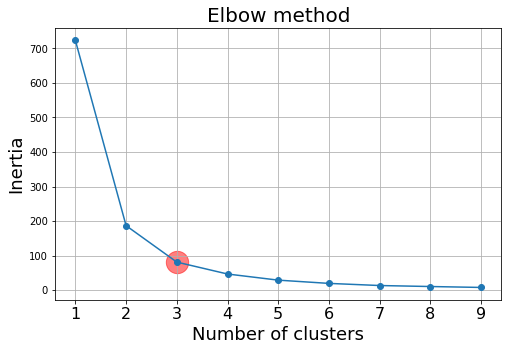

In [ ]:
inertias = []
for i in range(1,10):
 kmeans = KMeans(n_clusters=i , random_state=42)
 kmeans.fit(XJAN)
 inertias.append(kmeans.inertia_)
plt.figure(figsize = (8, 5))
plt.plot(range(1,10), inertias, marker='o')
plt.scatter(3, inertias[2], c='red', s=500, alpha=0.5)
plt.title('Elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

In [ ]:
#Ejecuta el algoritmo varias veces con diferentes clusters y obtenen sus coeficientes de silueta
from sklearn.metrics import silhouette_score, silhouette_samples
x2 = np.linspace(2,10,num=9)
y2 = []
for i in range(2,11):
    k = i
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit_predict(X)
    a = silhouette_score(X, kmeans2.labels_)
    y2.append(a)

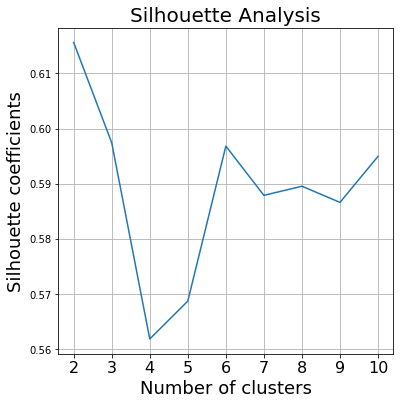

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(x2,y2)
plt.title('Silhouette Analysis', fontsize=20)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Silhouette coefficients', fontsize=18)
plt.xticks(fontsize=16)
plt.grid()

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3,random_state=0)
gmm.fit(XJAN)
AguaGrande["Gaussian_HFU"] = gmm.predict(XJAN)

In [ ]:
AguaGrandeHFU = {0:"2",1:"3",2:"1"}
AguaGrande = AguaGrande.replace({"Gaussian_HFU":AguaGrandeHFU})

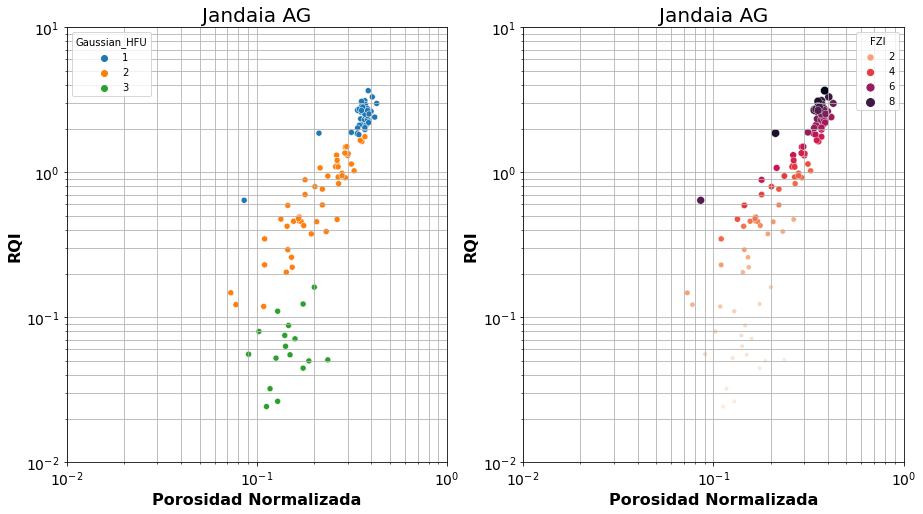

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x=AguaGrande["Poro_norm"],y=AguaGrande["RQI"],hue=AguaGrande["Gaussian_HFU"],palette="tab10")
plt.subplot(1,2,1).set_title("Jandaia AG",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("RQI", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).semilogx()
plt.subplot(1,2,1).set_ylim(0.01,10)
plt.subplot(1,2,1).set_xlim(0.01,1)
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).grid(which="both")

plt.subplot(1,2,2)
sns.scatterplot(x=AguaGrande["Poro_norm"],y=AguaGrande["RQI"],hue=AguaGrande["FZI"],size=AguaGrande["FZI"],palette="rocket_r")
plt.subplot(1,2,2).set_title("Jandaia AG",fontsize=20)
plt.subplot(1,2,2).set_xlabel("Porosidad Normalizada", fontsize=16, fontweight="bold")
plt.subplot(1,2,2).set_ylabel("RQI", fontsize=16,fontweight="bold")
plt.subplot(1,2,2).semilogy()
plt.subplot(1,2,2).semilogx()
plt.subplot(1,2,2).set_ylim(0.01,10)
plt.subplot(1,2,2).set_xlim(0.01,1)
plt.subplot(1,2,2).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).grid(which="both");

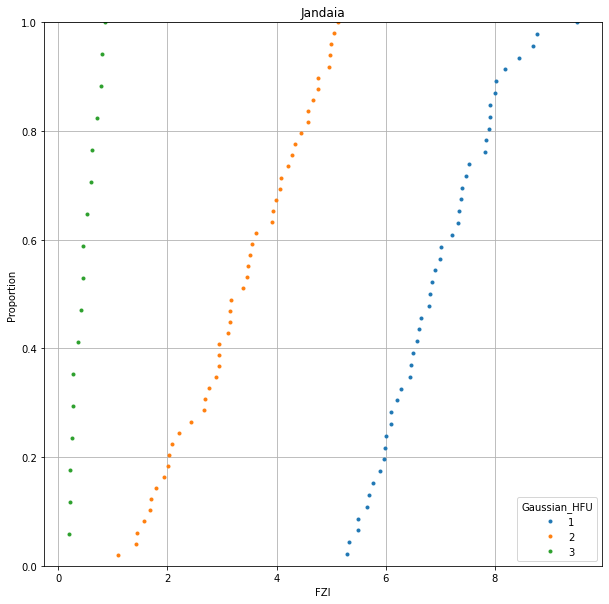

In [ ]:
fig , p = plt.subplots(figsize=(10,10))
p = sns.ecdfplot(data=AguaGrande, x="FZI",hue=AguaGrande["Gaussian_HFU"],palette="tab10",marker=".",linestyle="none")
p.set_title("Jandaia")
p.grid();

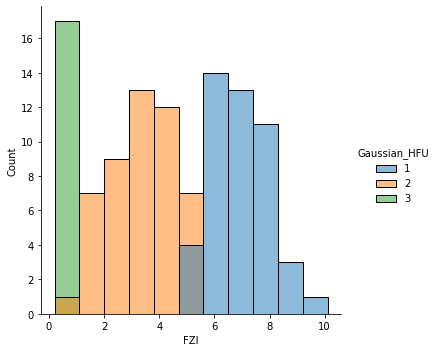

In [ ]:
sns.displot(data=AguaGrande,x=AguaGrande["FZI"],hue=AguaGrande["Gaussian_HFU"],fill=True,palette="tab10",binwidth=0.9)

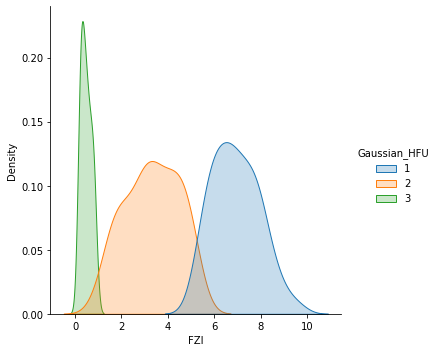

In [ ]:
sns.displot(data=AguaGrande,x=AguaGrande["FZI"],kind="kde",hue=AguaGrande["Gaussian_HFU"],fill=True,palette="tab10")

In [ ]:
Unidad1 = AguaGrande[(AguaGrande["Gaussian_HFU"]=="1")]

In [ ]:
Unidad1.describe()

,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,GR,NPHIL,RHOB,PEF
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.262913,1730.928261,2.474353,0.358969,6.922403,23.906756,0.228119,2.193966,4.283297
std,0.033115,651.839194,0.479173,0.052011,1.012976,6.323289,0.025017,0.052213,0.990662
min,0.079000,32.900000,0.640788,0.085776,5.283069,10.953517,0.135555,2.113760,2.285700
25%,0.260250,1388.475000,2.224339,0.351809,6.100818,19.388195,0.222252,2.165586,3.520589
50%,0.270000,1794.350000,2.522193,0.369863,6.826653,23.167531,0.230366,2.187355,4.277387
75%,0.276000,2000.525000,2.703893,0.381215,7.748853,29.713852,0.240658,2.202322,4.914913
max,0.299000,3770.800000,3.656992,0.426534,9.497655,37.565425,0.274963,2.402330,6.828348


In [ ]:
Unidad2 = AguaGrande[(AguaGrande["Gaussian_HFU"]=="2")]
Unidad3 = AguaGrande[(AguaGrande["Gaussian_HFU"]=="3")]

In [ ]:
Unidad2.describe()

,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,GR,NPHIL,RHOB,PEF
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.176816,180.685510,0.782158,0.219421,3.317136,34.766767,0.160833,2.357396,2.960776
std,0.051421,209.745139,0.455499,0.075749,1.151154,8.946389,0.034627,0.083270,0.691096
min,0.068000,1.090000,0.118681,0.072961,1.092348,18.652670,0.079347,2.157939,1.998147
25%,0.135000,28.000000,0.429006,0.156069,2.431032,28.012228,0.133468,2.300997,2.560889
50%,0.181000,107.600000,0.765590,0.221001,3.375523,33.221007,0.161690,2.348676,2.800569
75%,0.219000,260.300000,1.091681,0.280410,4.276127,40.518092,0.189733,2.425084,3.032474
max,0.270000,848.000000,1.759729,0.369863,5.123499,58.899330,0.237150,2.539117,5.470717


In [ ]:
Unidad3.describe()

,Poro_Core,Kh_mD,RQI,Poro_norm,FZI,GR,NPHIL,RHOB,PEF
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.128118,0.824706,0.068347,0.148079,0.470155,43.581630,0.138211,2.451667,2.751674
std,0.028011,1.074809,0.036060,0.037571,0.222500,17.687288,0.031046,0.059102,0.532490
min,0.083000,0.060000,0.024202,0.090513,0.204433,24.461417,0.081333,2.353193,2.187138
25%,0.112000,0.300000,0.049961,0.126126,0.266248,29.959033,0.120491,2.416481,2.337176
50%,0.124000,0.500000,0.055575,0.141553,0.445437,41.165857,0.137269,2.456974,2.645596
75%,0.149000,0.700000,0.079756,0.175088,0.614000,45.364441,0.160796,2.499776,3.071763
max,0.191000,4.400000,0.161175,0.236094,0.855205,93.308608,0.186477,2.559497,4.079696


KeyError: ignored

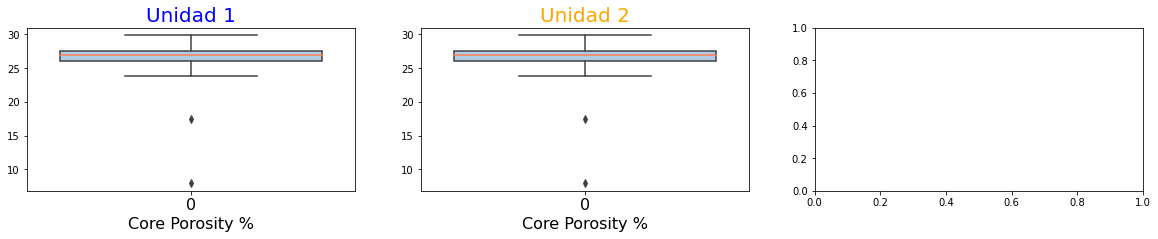

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(Unidad1["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16)
plt.title("Unidad 1", fontsize=20,color="blue")
plt.xticks(fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(Unidad2["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16)
plt.title("Unidad 2", fontsize=20,color="orange")
plt.xticks(fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(Unidad3["Poro_Core"]*100,orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Core Porosity %", fontsize=16);
plt.title("Unidad 3", fontsize=20,color="green")
plt.xticks(fontsize=16)

KeyError: ignored

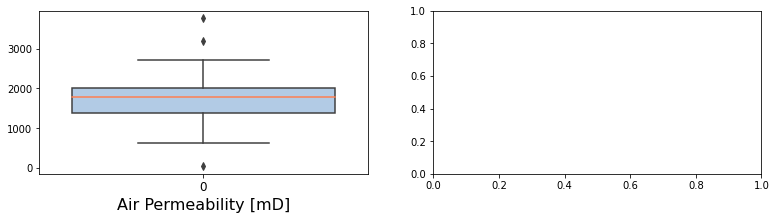

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(Unidad1["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16)
plt.xticks(fontsize=12)

plt.subplot(1,3,2)
sns.boxplot(Unidad2["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16)
plt.xticks(fontsize=12)

plt.subplot(1,3,3)
sns.boxplot(Unidad3["Kh_mD"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("Air Permeability [mD]", fontsize=16);
plt.xticks(fontsize=12)

In [ ]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(Unidad1["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(Unidad2["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16)
plt.xticks(fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(Unidad3["FZI"],orient="v",boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.xlabel("FZI", fontsize=16);
plt.xticks(fontsize=16)

In [ ]:
XU1 = Unidad1["Poro_Core"].values.reshape(-1,1)
yU1 = np.log10(Unidad1["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionU1=linear_model.LinearRegression()
linearRegressionU1.fit(XU1,yU1)
y_pred_U1=linearRegressionU1.predict(XU1)

In [ ]:
Xprueba = np.log10(Unidad1["Poro_Core"]).values.reshape(-1,1)
Yprueba = np.log10(Unidad1["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba=linear_model.LinearRegression()
linearRegressionPrueba.fit(Xprueba,Yprueba)
y_pred_prueba=linearRegressionPrueba.predict(Xprueba)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba.intercept_)
error=mean_squared_error(Yprueba,y_pred_prueba)
print('Error: %.3f'%error)
var=r2_score(Yprueba,y_pred_prueba)
print('R2: %.3f'%var)

Slope: 3.156
Intercept: 5.035
Error: 0.015
R2: 0.824


In [ ]:
print('Slope: %.3f'%linearRegressionU1.coef_[0])
print('Intercept: %.3f'%linearRegressionU1.intercept_)
error=mean_squared_error(yU1,y_pred_U1)
print('Error: %.3f'%error)
var=r2_score(yU1,y_pred_U1)
print('R2: %.3f'%var)

Slope: 7.884
Intercept: 1.112
Error: 0.018
R2: 0.787


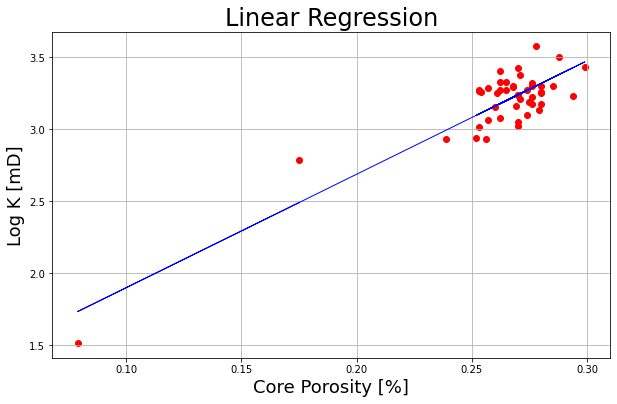

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(XU1,yU1,color="red")
plt.plot(XU1,y_pred_U1,color="blue",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("Log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

In [ ]:
XU2 = Unidad2["Poro_Core"].values.reshape(-1,1)
yU2 = np.log10(Unidad2["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba2 = np.log10(Unidad2["Poro_Core"]).values.reshape(-1,1)
Yprueba2 = np.log10(Unidad2["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba2=linear_model.LinearRegression()
linearRegressionPrueba2.fit(Xprueba2,Yprueba2)
y_pred_prueba2 =linearRegressionPrueba2.predict(Xprueba2)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba2.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba2.intercept_)
error=mean_squared_error(Yprueba2,y_pred_prueba2)
print('Error: %.3f'%error)
var=r2_score(Yprueba2,y_pred_prueba2)
print('R2: %.3f'%var)

Slope: 4.898
Intercept: 5.625
Error: 0.072
R2: 0.869


In [ ]:
linearRegressionU2=linear_model.LinearRegression()
linearRegressionU2.fit(XU2,yU2)
y_pred_U2=linearRegressionU2.predict(XU2)

In [ ]:
print('Slope: %.3f'%linearRegressionU2.coef_[0])
print('Intercept: %.3f'%linearRegressionU2.intercept_)
error=mean_squared_error(yU2,y_pred_U2)
print('Error: %.3f'%error)
var=r2_score(yU2,y_pred_U2)
print('R2: %.3f'%var)

Slope: 13.442
Intercept: -0.539
Error: 0.079
R2: 0.856


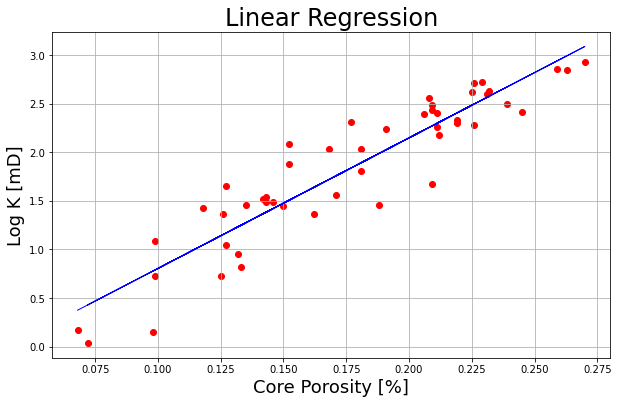

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(XU2,yU2,color="red")
plt.plot(XU2,y_pred_U2,color="blue",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("Log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

In [ ]:
XU3 = Unidad3["Poro_Core"].values.reshape(-1,1)
yU3 = np.log10(Unidad3["Kh_mD"]).values.reshape(-1,1)

In [ ]:
Xprueba3 = np.log10(Unidad3["Poro_Core"]).values.reshape(-1,1)
Yprueba3 = np.log10(Unidad3["Kh_mD"]).values.reshape(-1,1)

In [ ]:
linearRegressionPrueba3=linear_model.LinearRegression()
linearRegressionPrueba3.fit(Xprueba3,Yprueba3)
y_pred_prueba3=linearRegressionPrueba3.predict(Xprueba3)

In [ ]:
linearRegressionU3=linear_model.LinearRegression()
linearRegressionU3.fit(XU3,yU3)
y_pred_U3=linearRegressionU3.predict(XU3)

In [ ]:
print('Slope: %.3f'%linearRegressionPrueba3.coef_[0])
print('Intercept: %.3f'%linearRegressionPrueba3.intercept_)
error=mean_squared_error(Yprueba3,y_pred_prueba3)
print('Error: %.3f'%error)
var=r2_score(Yprueba3,y_pred_prueba3)
print('R2: %.3f'%var)

Slope: 2.462
Intercept: 1.887
Error: 0.171
R2: 0.228


In [ ]:
print('Slope: %.3f'%linearRegressionU3.coef_[0])
print('Intercept: %.3f'%linearRegressionU3.intercept_)
error=mean_squared_error(yU3,y_pred_U3)
print('Error: %.3f'%error)
var=r2_score(yU3,y_pred_U3)
print('R2: %.3f'%var)

Slope: 8.112
Intercept: -1.373
Error: 0.172
R2: 0.220


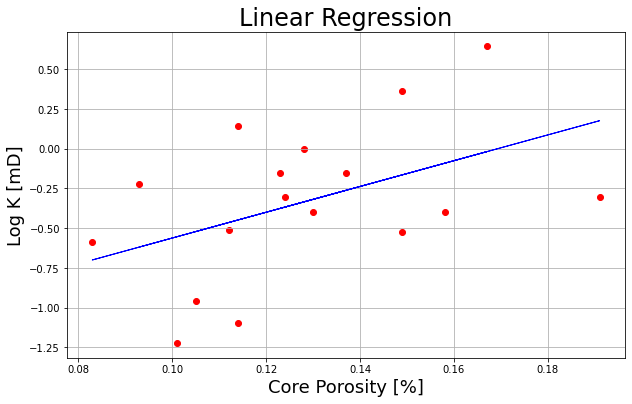

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(XU3,yU3,color="red")
plt.plot(XU3,y_pred_U3,color="blue",linewidth=1)
plt.xlabel("Core Porosity [%]",fontsize=18)
plt.ylabel("Log K [mD]",fontsize=18)
plt.title('Linear Regression',fontsize=24)
plt.grid()
plt.show()

In [ ]:
i = 0
Porosidad_Lista = []
while i<=0.31:
    Porosidad_Lista.append(i)
    i = i + 0.010

In [ ]:
ECU1 = []
for i in Porosidad_Lista:
    a = 10**(5.035)*i**(3.156)
    ECU1.append(a)
ECU2 = []
for i in Porosidad_Lista:
    a = 10**(5.625)*i**(4.898)
    ECU2.append(a)
ECU3 = []
for i in Porosidad_Lista:
    a = 10**(1.887)*i**(2.462)
    ECU3.append(a)

In [ ]:
dicc1 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU1}
ModeloPerm_U1 = pd.DataFrame(dicc1)
dicc2 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU2}
ModeloPerm_U2 = pd.DataFrame(dicc2)
dicc3 = {"Porosidad":Porosidad_Lista,
         "Permeabilidad":ECU3}
ModeloPerm_U3 = pd.DataFrame(dicc3)

<ipython-input-145-8732c41158c4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


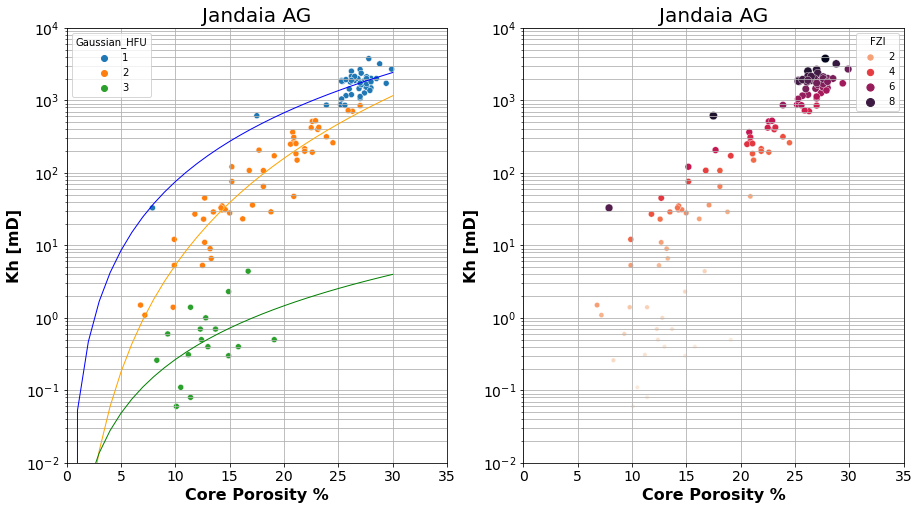

In [ ]:
fig , p = plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x=AguaGrande['Poro_Core']*100,y=AguaGrande["Kh_mD"],hue=AguaGrande["Gaussian_HFU"],palette="tab10")
plt.plot(ModeloPerm_U1["Porosidad"]*100,ModeloPerm_U1["Permeabilidad"],color="blue",linewidth=1)
plt.plot(ModeloPerm_U2["Porosidad"]*100,ModeloPerm_U2["Permeabilidad"],color="orange",linewidth=1)
plt.plot(ModeloPerm_U3["Porosidad"]*100,ModeloPerm_U3["Permeabilidad"],color="green",linewidth=1)
plt.subplot(1,2,1).set_title("Jandaia AG",fontsize=20)
plt.subplot(1,2,1).set_xlabel("Core Porosity %", fontsize=16, fontweight="bold")
plt.subplot(1,2,1).set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
plt.subplot(1,2,1).set_yscale(value="log")
plt.subplot(1,2,1).semilogy()
plt.subplot(1,2,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,1).set_ylim(0.01,10000)
plt.subplot(1,2,1).set_xlim(0,35)
plt.subplot(1,2,1).grid(which="both");

plt.subplot(1,2,2)
sns.scatterplot(x=AguaGrande["Poro_Core"]*100,y=AguaGrande["Kh_mD"],hue=AguaGrande["FZI"],size=AguaGrande["FZI"],palette="rocket_r")
plt.subplot(1,2,2).set_title("Jandaia AG",fontsize=20)
plt.subplot(1,2,2).set_xlabel("Core Porosity %", fontsize=16, fontweight="bold")
plt.subplot(1,2,2).set_ylabel("Kh [mD]", fontsize=16,fontweight="bold")
plt.subplot(1,2,2).semilogy()
plt.subplot(1,2,2).set_ylim(0.01,10000)
plt.subplot(1,2,2).set_xlim(0,35)
plt.subplot(1,2,2).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,2,2).grid(which="both");

In [ ]:
Well_3JND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MD         74 non-null     float64
 1   Poro_Core  74 non-null     float64
 2   Kh_mD      74 non-null     float64
 3   RQI        74 non-null     float64
 4   Poro_norm  74 non-null     float64
 5   FZI        74 non-null     float64
 6   CALI       74 non-null     float64
 7   BS         74 non-null     float64
 8   GR         74 non-null     float64
 9   RDEEP      74 non-null     float64
 10  NPHIL      74 non-null     float64
 11  NPHIS      74 non-null     float64
 12  RHOB       74 non-null     float64
 13  PEF        74 non-null     float64
 14  DTC        74 non-null     float64
 15  DRHO       74 non-null     float64
 16  PHIE       74 non-null     float64
 17  PHIT       74 non-null     float64
 18  Well       74 non-null     object 
dtypes: float64(18), object(1)
memory usage: 11.1+ KB


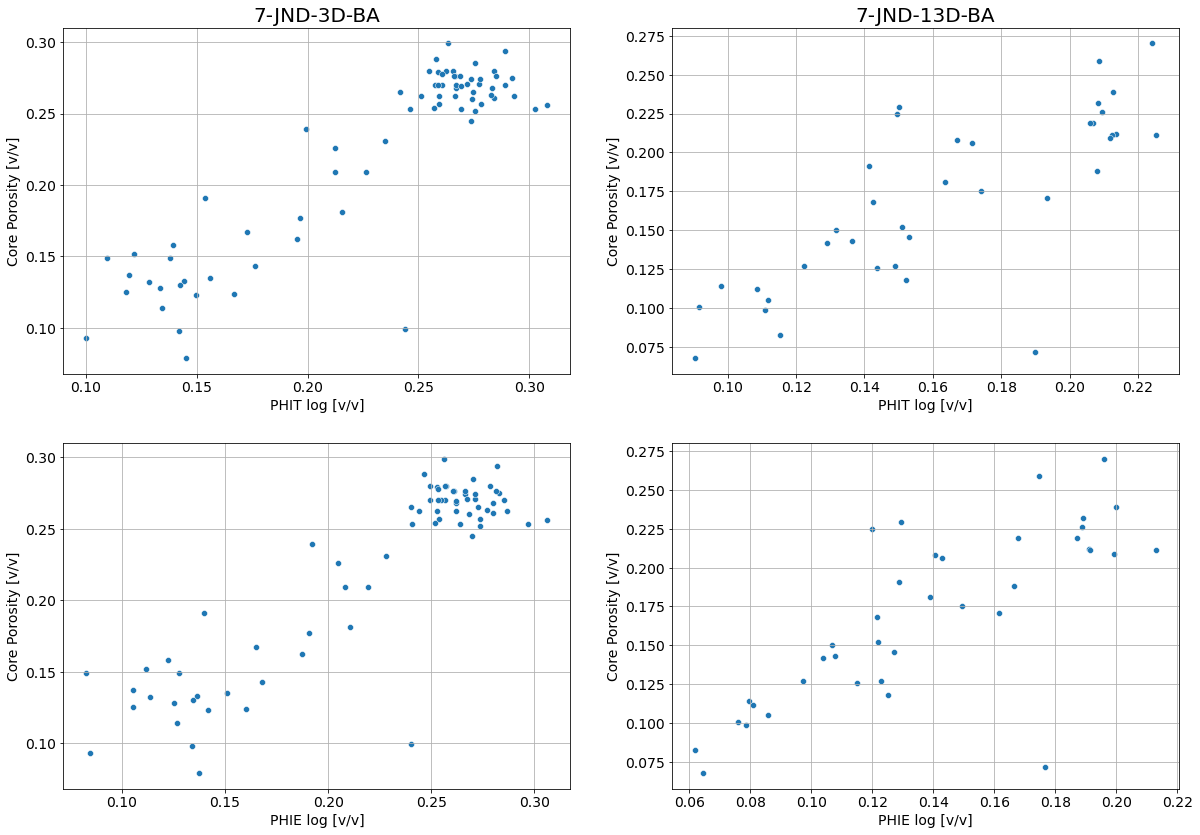

In [ ]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
p = sns.scatterplot(x=Well_3JND['PHIT'],y=Well_3JND["Poro_Core"])
p.set_xlabel("PHIT log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.set_title("7-JND-3D-BA",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both")

plt.subplot(2,2,2)
p = sns.scatterplot(x=Well_13JND['PHIT'],y=Well_13JND["Poro_Core"])
p.set_xlabel("PHIT log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.set_title("7-JND-13D-BA",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both")

plt.subplot(2,2,3)
p = sns.scatterplot(x=Well_3JND['PHIE'],y=Well_3JND["Poro_Core"])
p.set_xlabel("PHIE log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both")

plt.subplot(2,2,4)
p = sns.scatterplot(x=Well_13JND['PHIE'],y=Well_13JND["Poro_Core"])
p.set_xlabel("PHIE log [v/v]", fontsize=14)
p.set_ylabel("Core Porosity [v/v]", fontsize=14)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.grid(which="both")

#Machine Learning

##Jandaia

In [ ]:
AguaGrande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Poro_Core     112 non-null    float64
 1   Kh_mD         112 non-null    float64
 2   RQI           112 non-null    float64
 3   Poro_norm     112 non-null    float64
 4   FZI           112 non-null    float64
 5   GR            112 non-null    float64
 6   NPHIL         112 non-null    float64
 7   RHOB          112 non-null    float64
 8   PEF           112 non-null    float64
 9   Well          112 non-null    object 
 10  Gaussian_HFU  112 non-null    object 
dtypes: float64(9), object(2)
memory usage: 9.8+ KB


In [ ]:
Analisis = AguaGrande[["FZI","Gaussian_HFU","GR","NPHIL","RHOB","PEF"]]

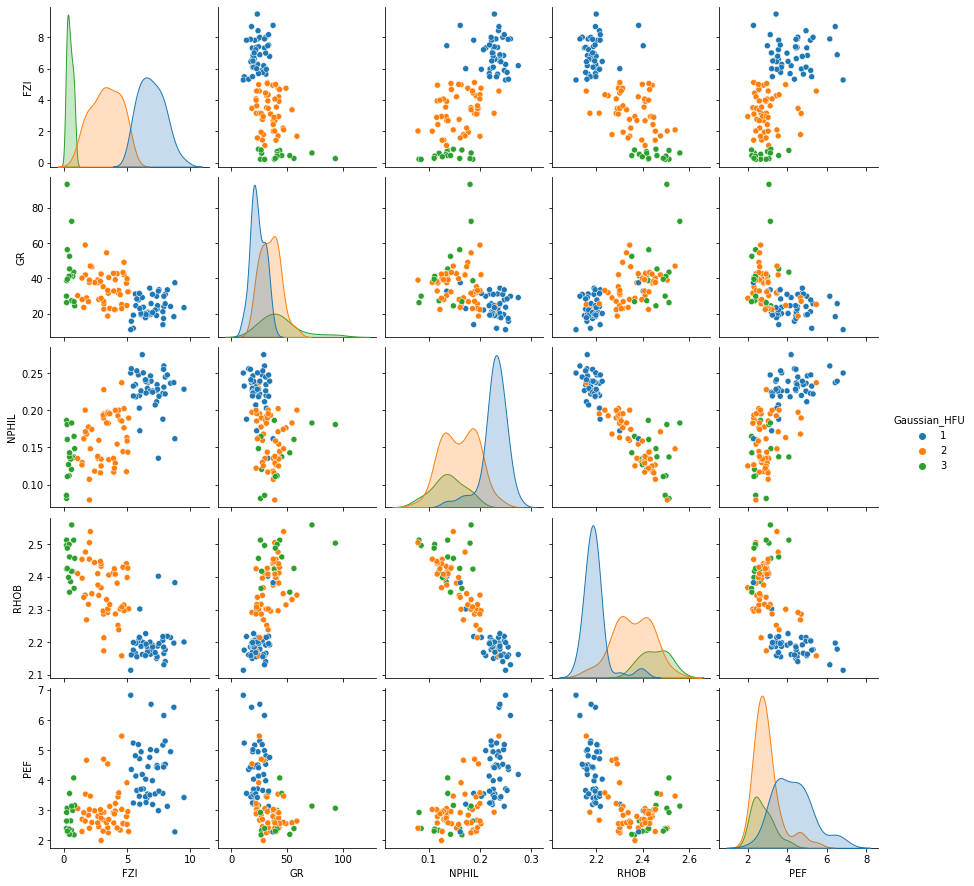

In [ ]:
sns.pairplot(Analisis,hue="Gaussian_HFU");

###Regression

**Regresión Lineal**

In [ ]:
X_JAN = AguaGrande[["GR","NPHIL","RHOB","PEF"]]
y_JAN_Reg = AguaGrande["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Reg, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
multipleregressor = LinearRegression()
multipleregressor.fit(X_JAN,y_JAN_Reg) 

LinearRegression()

In [ ]:
y_multiple_pred = multipleregressor.predict(X_JAN)

In [ ]:
error=mean_squared_error(y_JAN_Reg,y_multiple_pred)
print('Error: %.3f'%error)
var=r2_score(y_JAN_Reg,y_multiple_pred)
print('R2: %.3f'%var)

Error: 2.455
R2: 0.620


In [ ]:
y_JAN_Reg = y_JAN_Reg.tolist()
y_multiple_pred = y_multiple_pred.tolist()

In [ ]:
df = pd.DataFrame({'FZI Original':y_JAN_Reg, 'FZI Prediction': y_multiple_pred})

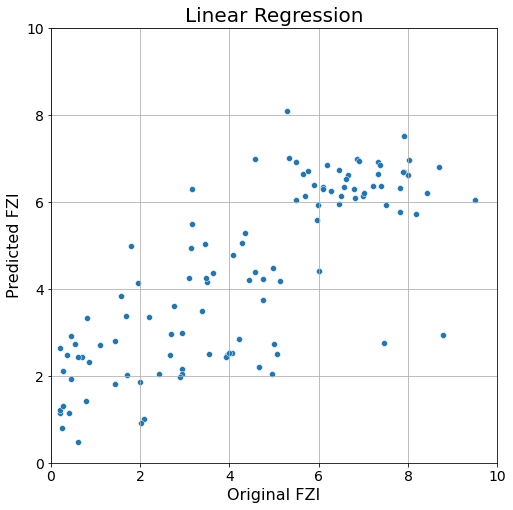

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=df['FZI Original'],y=df['FZI Prediction'])
p.set_title("Linear Regression",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

**SVR**

In [ ]:
X_JAN = AguaGrande[["GR","NPHIL","RHOB","PEF"]].values
y_JAN_Reg = AguaGrande["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Reg, test_size = 0.3, random_state = 42)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_JAN)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
param_grid = [
  {'C': [0.25, 0.5, 1, 5, 10, 20], 'kernel': ['linear']},
  {'C': [0.25, 0.5, 1,5,10,20], 'kernel': ['rbf']}
 ]

In [ ]:
GridS = GridSearchCV(SVR(),
                     param_grid,
                     scoring= "r2",
                     cv=5).fit(X_train_scaled,y_train)
best_accuracy = GridS.best_score_
best_parameters = GridS.best_params_
print("Best R2: {:.02f}".format(best_accuracy))
print("Best Parameters: ", best_parameters)

Best R2: 0.53
Best Parameters:  {'C': 0.5, 'kernel': 'linear'}


In [ ]:
SVR_model = Pipeline([
    ("Escalar", StandardScaler()),
    ("SVR", SVR(C=0.5,kernel="linear"))
])

In [ ]:
SVR_model.fit(X_train,y_train)

Pipeline(steps=[('Escalar', StandardScaler()),
                ('SVR', SVR(C=0.5, kernel='linear'))])

In [ ]:
SVR_model.score(X_test,y_test)

0.5900491435384506

In [ ]:
y_pred_SVR = SVR_model.predict(X_test)
r2_score(y_test,y_pred_SVR)

0.5900491435384506

In [ ]:
mean_squared_error(y_test,y_pred_SVR)

2.6908981490226505

In [ ]:
y_pred_SVR_train = SVR_model.predict(X_train)
error=mean_squared_error(y_train,y_pred_SVR_train)
print('Error: %.3f'%error)
var=r2_score(y_train,y_pred_SVR_train)
print('R2: %.3f'%var)

Error: 2.445
R2: 0.618


In [ ]:
y_pred_SVR_alldata = SVR_model.predict(X_JAN)
error=mean_squared_error(y_JAN_Reg,y_pred_SVR_alldata)
print('Error: %.3f'%error)
var=r2_score(y_JAN_Reg,y_pred_SVR_alldata)
print('R2: %.3f'%var)

Error: 2.519
R2: 0.610


In [ ]:
SVR_X = cross_val_score(SVR(C=0.5,kernel="linear"), X_train_scaled, y_train, scoring="r2",cv = 10)
print("R2: {:.02f}".format(SVR_X.mean()))
print("Standard Deviation: {:.02f} %".format(SVR_X.std()*100))

R2: 0.46
Standard Deviation: 31.86 %


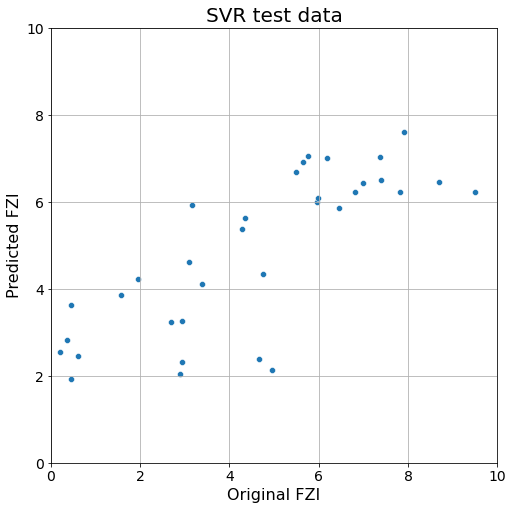

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=y_test,y=y_pred_SVR)
p.set_title("SVR test data",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

Ideal: nan
> folds=2, accuracy=0.579 (0.565,0.593)
> folds=3, accuracy=0.571 (0.487,0.653)
> folds=4, accuracy=0.595 (0.464,0.711)
> folds=5, accuracy=0.566 (0.397,0.819)
> folds=6, accuracy=0.568 (0.292,0.847)
> folds=7, accuracy=0.526 (-0.128,0.792)
> folds=8, accuracy=0.581 (0.289,0.844)
> folds=9, accuracy=0.545 (0.114,0.749)
> folds=10, accuracy=0.527 (-0.113,0.872)
> folds=11, accuracy=0.552 (0.206,0.931)
> folds=12, accuracy=0.545 (0.221,0.875)
> folds=13, accuracy=0.496 (-0.141,0.875)
> folds=14, accuracy=0.547 (-0.141,0.947)
> folds=15, accuracy=0.498 (-0.560,0.947)
> folds=16, accuracy=0.328 (-2.234,0.894)
> folds=17, accuracy=0.345 (-2.234,0.946)
> folds=18, accuracy=0.343 (-2.234,0.946)
> folds=19, accuracy=0.360 (-2.272,0.946)


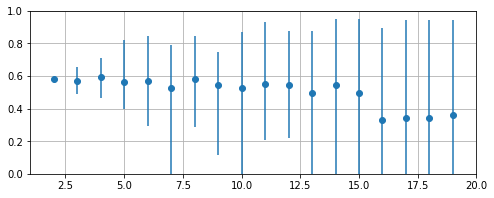

In [ ]:
plt.figure(figsize=(8,3))

# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def evaluate_model(cv):
 scores = cross_val_score(SVR_model, X_train_scaled, y_train, scoring='r2', cv=cv, n_jobs=-1)
 # return scores
 return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,20)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
 # define the test condition
 cv = KFold(n_splits=k, shuffle=True, random_state=1)
 # evaluate k value
 k_mean, k_min, k_max = evaluate_model(cv)
 # report performance
 print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
 # store mean accuracy
 means.append(k_mean)
 # store min and max relative to the mean
 mins.append(k_mean - k_min)
 maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.xlim(1,20)
pyplot.ylim(0,1)
plt.grid()
pyplot.show()


**Random Forest Regressor**

In [ ]:
X_JAN = AguaGrande[["GR","NPHIL","RHOB","PEF"]].values
y_JAN_Reg = AguaGrande["FZI"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Reg, test_size = 0.3, random_state = 42)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_JAN)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
RFR = cross_val_score(RandomForestRegressor(random_state=0), X_train, y_train, scoring="r2",cv = 5)
print("R2: {:.02f}".format(RFR.mean()))
print("Standard Deviation: {:.02f} %".format(RFR.std()*100))

R2: 0.43
Standard Deviation: 19.11 %


In [ ]:
param_grid = [{
    "n_estimators":[1,2,3,4,5,6,7,8,9,10,12,14,16,20,30,50], 
    "max_features":[1,2,3,4]
}]
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),param_grid,cv=10,scoring="r2",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [1, 2, 3, 4],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                           14, 16, 20, 30, 50]}],
             return_train_score=True, scoring='r2')

In [ ]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 50}

In [ ]:
grid_search.best_score_

0.433349633764489

In [ ]:
reg_forest = grid_search.best_estimator_

In [ ]:
y_pred_RFR = reg_forest.predict(X_test)

In [ ]:
y_pred_RFR_train = reg_forest.predict(X_train)

In [ ]:
error=mean_squared_error(y_train,y_pred_RFR_train)
print('Error: %.3f'%error)
var=r2_score(y_train,y_pred_RFR_train)
print('R2: %.3f'%var)

Error: 0.364
R2: 0.943


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_RFR)

0.6174140457452377

In [ ]:
error=mean_squared_error(y_test,y_pred_RFR)
print('Error: %.3f'%error)
var=r2_score(y_test,y_pred_RFR)
print('R2: %.3f'%var)

Error: 2.511
R2: 0.617


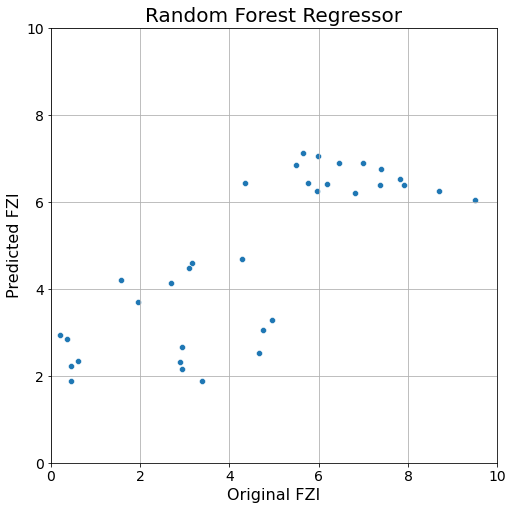

In [ ]:
fig , p = plt.subplots(figsize=(8,8))
p = sns.scatterplot(x=y_test,y=y_pred_RFR)
p.set_title("Random Forest Regressor",fontsize=20)
p.yaxis.set_tick_params(labelsize=14)
p.xaxis.set_tick_params(labelsize=14)
p.set_xlabel("Original FZI",fontsize=16)
p.set_ylabel("Predicted FZI", fontsize=16)
p.set_xlim(0,10)
p.set_ylim(0,10)
p.grid()

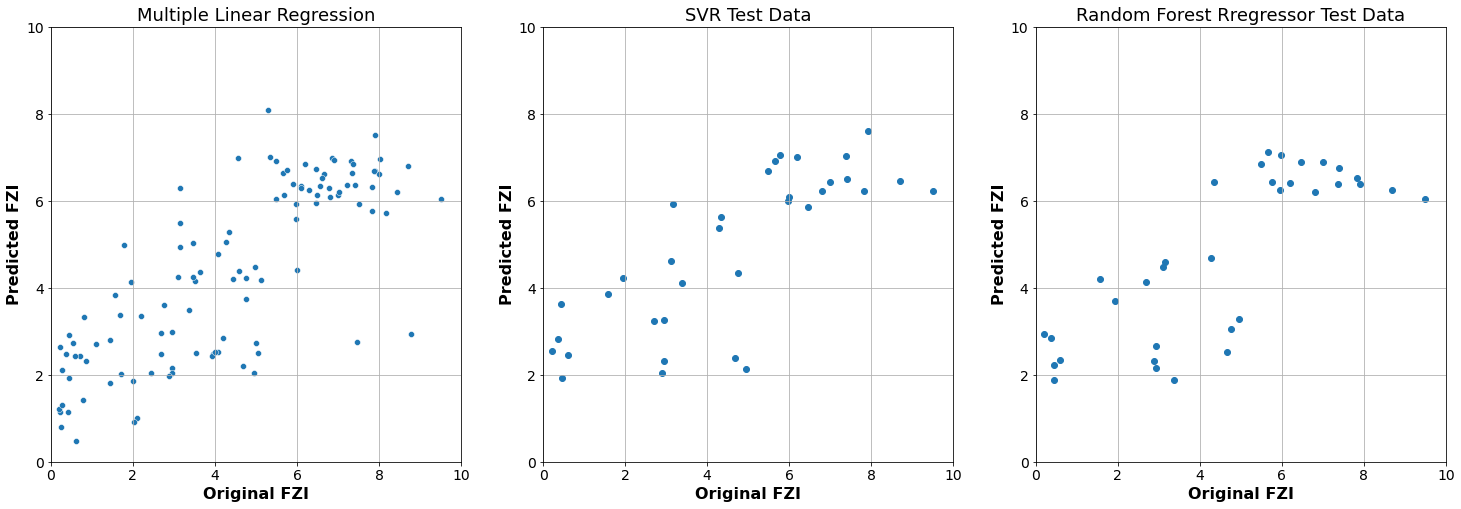

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
sns.scatterplot(x=df['FZI Original'],y=df['FZI Prediction'])
plt.subplot(1,3,1).set_title("Multiple Linear Regression",fontsize=18)
plt.subplot(1,3,1).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,1).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,1).set_ylim(0,10)
plt.subplot(1,3,1).set_xlim(0,10)
plt.subplot(1,3,1).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,1).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,1).grid(which="both")

plt.subplot(1,3,2)
plt.scatter(y_test,y_pred_SVR)
plt.subplot(1,3,2).set_title("SVR Test Data",fontsize=18)
plt.subplot(1,3,2).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,2).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,2).set_ylim(0,10)
plt.subplot(1,3,2).set_xlim(0,10)
plt.subplot(1,3,2).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,2).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,2).grid(which="both")


plt.subplot(1,3,3)
plt.scatter(y_test,y_pred_RFR)
plt.subplot(1,3,3).set_title("Random Forest Rregressor Test Data",fontsize=18)
plt.subplot(1,3,3).set_xlabel("Original FZI", fontsize=16, fontweight="bold")
plt.subplot(1,3,3).set_ylabel("Predicted FZI", fontsize=16,fontweight="bold")
plt.subplot(1,3,3).set_ylim(0,10)
plt.subplot(1,3,3).set_xlim(0,10)
plt.subplot(1,3,3).yaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,3).xaxis.set_tick_params(labelsize=14)
plt.subplot(1,3,3).grid(which="both")

**ADA boost**

In [ ]:
#Importar AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#Crear objeto de Adaboost con árboles de decisiones  
ada = AdaBoostRegressor(DecisionTreeRegressor(),
                         n_estimators=100,
                         learning_rate=0.1)
ada.fit(X_train,y_train)

In [ ]:
y_pred=ada.predict(X_test)

In [ ]:
error=mean_squared_error(y_test,y_pred)
print('Error: %.3f'%error)
var=r2_score(y_test,y_pred)
print('R2: %.3f'%var)

**Gradient Boost**

In [ ]:
xgb = XGBRegressor(max_depth=2,n_estimators=100,learning_rate=0.1)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
error=mean_squared_error(y_test,y_pred_xgb)
print('Error: %.3f'%error)
var=r2_score(y_test,y_pred_xgb)
print('R2: %.3f'%var)

###Classification

**SVM**

In [ ]:
X_CORE3D = core_3JND[["FZI"]]
core_3JND["Gaussian_HFU"] = gmm.predict(X_CORE3D)
AguaGrandeHFU = {2:"1",1:"3",0:"2"}
core_3JND = core_3JND.replace({"Gaussian_HFU":AguaGrandeHFU})

In [ ]:
X_JAN = AguaGrande[["GR","NPHIL","RHOB"]]
y_JAN_Cla = AguaGrande["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Cla, test_size = 0.3, random_state = 5)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_JAN)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
SVC_1 = SVC(class_weight="balanced")
SVC_1.get_params()

In [ ]:
param_grid = [
  {'C': [0.25, 0.5 ,1, 5, 10, 15,20], 'kernel': ['linear']},
  {'C': [0.25, 0.5, 1, 10, 100, 1000], 'kernel': ['rbf']},
 ]

In [ ]:
BusquedaSVM = GridSearchCV(SVC_1,
                     param_grid,
                     scoring= "accuracy",
                     cv=10).fit(X_train_scaled,y_train)
best_accuracy = BusquedaSVM.best_score_
best_parameters = BusquedaSVM.best_params_
print("Best Accuracy: {:.02f}".format(best_accuracy))
print("Best Parameters: ", best_parameters)

In [ ]:
BusquedaSVM.cv_results_["mean_test_score"]

In [ ]:
RFC = cross_val_score(SVC(C=10,kernel="linear"), X_scaled, y_JAN_Cla, scoring="accuracy",cv = 5)
print("R2: {:.02f}".format(RFC.mean()))
print("Standard Deviation: {:.02f} %".format(RFC.std()*100))

In [ ]:
clf = BusquedaSVM.best_estimator_

In [ ]:
y_pred_clf = clf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_clf)

In [ ]:
print(classification_report(y_test, y_pred_clf))

In [ ]:
multilabel_confusion_matrix(y_test, y_pred_clf)

In [ ]:
Registros = registro_7JND_AG[["GR","NPHIL","RHOB"]]

In [ ]:
Registros_escalados = scx.transform(Registros)

In [ ]:
Pozo1_Predicción_SVC = clf.predict(Registros_escalados)
Pozo1_Predicción_SVC = np.asfarray(Pozo1_Predicción_SVC)
registro_7JND_AG["Predicted SVC"] = Pozo1_Predicción_SVC

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_7JND_AG['Predicted SVC'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

**Random Forest**

In [ ]:
X_JAN = AguaGrande[["GR","NPHIL","RHOB"]]
y_JAN_Cla = AguaGrande["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Cla, test_size = 0.3, random_state = 5)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_JAN)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
RFC = RandomForestClassifier()
RFC.get_params()

In [ ]:
RFC = cross_val_score(RandomForestClassifier(max_features=2,n_estimators=6,min_samples_leaf=5,random_state=0), X_scaled, y_JAN_Cla, scoring="accuracy",cv = 5)
print("R2: {:.02f}".format(RFC.mean()))
print("Standard Deviation: {:.02f} %".format(RFC.std()*100))

In [ ]:
param_grid = [{
    "n_estimators":[5,6,7,8,9,10,15,20,30,50], 
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [2,3]
}]

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=0,class_weight="balanced"),param_grid,cv=5,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train_scaled,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
RFC_grid = grid_search.best_estimator_
y_pred_RFC = RFC_grid.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_RFC))

In [ ]:
multilabel_confusion_matrix(y_test, y_pred_RFC)

In [ ]:
X_new_prediction = scx.transform(registro_7JND_AG[["GR","NPHIL","RHOB"]])

In [ ]:
Pozo1_Predicción = RFC_grid.predict(X_new_prediction)

In [ ]:
Pozo1_Predicción = np.asfarray(Pozo1_Predicción)

In [ ]:
registro_7JND_AG["Predicted RFC"] = Pozo1_Predicción

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_7JND_AG['Predicted RFC'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

**Gradient Boost**

In [ ]:
Prueba = AguaGrande[["GR","NPHIL","RHOB","Gaussian_HFU"]]
Cambio = {"1":0,"2":1,"3":2}
Prueba = Prueba.replace({"Gaussian_HFU":Cambio})
X_JAN = Prueba[["GR","NPHIL","RHOB"]]
y_JAN_Cla_GB = Prueba["Gaussian_HFU"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_JAN, y_JAN_Cla_GB, test_size = 0.3, random_state = 5)

In [ ]:
scx = StandardScaler()
scy = StandardScaler()
X_scaled = scx.fit_transform(X_JAN)
X_train_scaled = scx.transform(X_train)
X_test_scaled = scx.transform(X_test)
# y_scaled = scy.fit_transform(y_JAN_Reg)
# y_train_scaled = scy.transform(y_train)
# y_test_scaled = scy.transform(y_test)

In [ ]:
RFC = cross_val_score(XGBClassifier(learning_rate=0.3,n_estimators=10,random_state=0), X_scaled, y_JAN_Cla_GB, scoring="accuracy",cv = 10)
print("R2: {:.02f}".format(RFC.mean()))
print("Standard Deviation: {:.02f} %".format(RFC.std()*100))

In [ ]:
param_test1 = [
    {'n_estimators':range(10,50,5),"learning_rate":[0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]}
]

In [ ]:
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,random_state=10), 
param_grid = param_test1, cv=5)
gsearch1.fit(X_train_scaled,y_train)

In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [ ]:
xgb_CLA = gsearch1.best_estimator_
y_pred_xgb = xgb_CLA.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))

In [ ]:
multilabel_confusion_matrix(y_test, y_pred_xgb)

In [ ]:
registro_7JND_AG = registro_7JND[(930<=registro_7JND["MD"]) & (registro_7JND["MD"]<=968)]

In [ ]:
X_new_prediction = scx.transform(registro_7JND_AG[["GR","NPHIL","RHOB"]])

In [ ]:
Pozo1_Predicción_GB = xgb_CLA.predict(X_new_prediction)
Pozo1_Predicción_GB = np.asfarray(Pozo1_Predicción_GB)
registro_7JND_AG["Predicted XGB"] = Pozo1_Predicción_GB

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_7JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
registro_13JND_AG = registro_13JND[(965<=registro_13JND["MD"]) & (registro_13JND["MD"]<=1008)]
registro_13JND_AG = registro_13JND_AG[(registro_13JND_AG["CAL"]<9)]

In [ ]:
X_new_prediction = scx.transform(registro_13JND_AG[["GR","NPHIL","RHOB"]])

In [ ]:
Pozo1_Predicción_GB = xgb_CLA.predict(X_new_prediction)
Pozo1_Predicción_GB = np.asfarray(Pozo1_Predicción_GB)
registro_13JND_AG["Predicted XGB"] = Pozo1_Predicción_GB

In [ ]:
X_CORE13D = core_13JND[["FZI"]]
core_13JND["Gaussian_HFU"] = gmm.predict(X_CORE13D)

In [ ]:
AguaGrandeHFU = {2:1,1:3,0:2}
core_13JND = core_13JND.replace({"Gaussian_HFU":AguaGrandeHFU})

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,200)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,200)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,200)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.90,2.90)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIL","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHI (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_13JND,linestyle="-",color="purple")
ax10.set_xlim(0,20)
ax10.set_xlabel("PEFZ (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_13JND["Poro_Core"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_13JND["Kh_mD"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.02,2000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_13JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

###Clustering

K-Means


In [ ]:
X_JAN_CLUS = AguaGrande[["GR","NPHIL","RHOB"]]
X_JAN_CLUS

In [ ]:
X_JAN_CLUS_scaled = scx.transform(X_JAN_CLUS)

In [ ]:
X = X_JAN_CLUS_scaled

In [ ]:
registro_7JND_AG = registro_7JND[(932<=registro_7JND["MD"]) & (registro_7JND["MD"]<=968)]

In [ ]:
y_true = AguaGrande["Gaussian_HFU"].values

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
y_pred_kmeans = kmeans_model.predict(scx.transform(AguaGrande[["GR","NPHIL","RHOB"]]))

In [ ]:
y_true

In [ ]:
y_pred_kmeans

In [ ]:
y_pred_kmeans = pd.DataFrame(y_pred_kmeans,columns=["HFU_KMeans"])
KMeansHFU = {1:"1",0:"2",2:"3"}
y_pred_kmeans = y_pred_kmeans.replace({"HFU_KMeans":KMeansHFU})
y_pred_kmeans = y_pred_kmeans["HFU_KMeans"].values

In [ ]:
print(classification_report(y_true, y_pred_kmeans))

In [ ]:
registro_7JND_AG["Kmeans"] = kmeans_model.predict(scx.transform(registro_7JND_AG[["GR","NPHIL","RHOB"]]))

In [ ]:
KMeansHFU = {1:1,0:2,2:3}
registro_7JND_AG = registro_7JND_AG.replace({"Kmeans":KMeansHFU})

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_7JND_AG['Kmeans'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

Hierarchical Clustering

In [ ]:
hierarchicClustering = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean",linkage = 'ward')
hierarchicClustering.fit(X)
y_pred_HC = hierarchicClustering.labels_

In [ ]:
y_pred_HC

In [ ]:
y_pred_HC = pd.DataFrame(y_pred_HC,columns=["HFU_HierClus"])
KMeansHFU = {1:"2",0:"1",2:"3"}
y_pred_HC = y_pred_HC.replace({"HFU_HierClus":KMeansHFU})
y_pred_HC = y_pred_HC["HFU_HierClus"].values

In [ ]:
print(classification_report(y_true, y_pred_HC))

In [ ]:
registro_7JND_AG = registro_7JND[(932<=registro_7JND["MD"]) & (registro_7JND["MD"]<=968)]

In [ ]:
registro_7JND_AG = registro_7JND[(934<=registro_7JND["MD"]) & (registro_7JND["MD"]<=964.7)]

In [ ]:
registro_7JND_AG["HierClus"] = hierarchicClustering.fit_predict(scx.transform(registro_7JND_AG[["GR","NPHIL","RHOB"]]))

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.tick_params(axis="x",colors="purple")

HFU = np.vstack(registro_7JND_AG['HierClus'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##3D

In [ ]:
fig, axes = plt.subplots(figsize=(40,20),sharey=True)

ax1 = plt.subplot2grid((1,9),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,9),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,9),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,9),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,9),(0,4),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,9),(0,5),rowspan=1,colspan=1)
ax15 = plt.subplot2grid((1,9),(0,6),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,9),(0,7),rowspan=1,colspan=1)
ax16 = plt.subplot2grid((1,9),(0,8),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,9),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")
ax12.set_ylabel("",color="white")

ax13 = plt.subplot2grid((1,9),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10")
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.set_ylabel("",color="white")
ax13.tick_params(axis="x",colors="purple")
ax13.tick_params(axis="y",colors="white")

HFU = np.vstack(registro_7JND_AG['Predicted SVC'])
ax14.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax14.set_title('HFU SVC', fontsize='15')
ax14.grid(which="both")
ax14.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Predicted RFC'])
ax15.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax15.set_title('HFU RFC', fontsize='15')
ax15.grid(which="both")
ax15.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('HFU XGB', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Kmeans'])
ax16.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax16.set_title('HFU KMeans', fontsize='15')
ax16.grid(which="both")
ax16.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
fig, axes = plt.subplots(figsize=(60,30),sharey=True)

ax1 = plt.subplot2grid((1,8),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,8),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,8),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,8),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,8),(0,4),rowspan=1,colspan=1)
ax15 = plt.subplot2grid((1,8),(0,6),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,8),(0,7),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green",fontsize=25)
ax1.tick_params(axis="x",colors="green")
# ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=24)
ax1.yaxis.set_tick_params(labelsize=25)
ax1.xaxis.set_tick_params(labelsize=22)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown",fontsize=25)
ax2.tick_params(axis="x",colors="brown")
ax2.xaxis.set_tick_params(labelsize=22)

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black",fontsize=25)
ax3.tick_params(axis="x",colors="black")
ax3.xaxis.set_tick_params(labelsize=22)

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red",fontsize=25)
ax4.tick_params(axis="x",colors="red")
ax4.xaxis.set_tick_params(labelsize=22)

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue",fontsize=25)
ax5.tick_params(axis="x",colors="blue")
ax5.xaxis.set_tick_params(labelsize=22)

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray",fontsize=25)
ax6.tick_params(axis="x",colors="gray")
ax6.xaxis.set_tick_params(labelsize=22)

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red",fontsize=25)
ax8.tick_params(axis="x",colors="red")
ax8.xaxis.set_tick_params(labelsize=22)

ax9.plot("NPHIL","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green",fontsize=25)
ax9.tick_params(axis="x",colors="green")
ax9.xaxis.set_tick_params(labelsize=22)

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple",fontsize=25)
ax10.tick_params(axis="x",colors="purple")
ax10.xaxis.set_tick_params(labelsize=22)

plt.subplot2grid((1,8),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=80)
ax12.set_xlabel("Core Porosity (frac)",color="black",fontsize=25)
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")
ax12.set_ylabel("",color="white")
ax12.xaxis.set_tick_params(labelsize=22)

ax13 = plt.subplot2grid((1,8),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=80)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple",fontsize=25)
ax13.set_ylabel("",color="white")
ax13.tick_params(axis="x",colors="purple")
ax13.tick_params(axis="y",colors="white")
ax13.xaxis.set_tick_params(labelsize=22)

HFU = np.vstack(registro_7JND_AG['Predicted SVC'])
ax14.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax14.set_title('HFU SVC', fontsize=25)
ax14.grid(which="both")
ax14.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Predicted RFC'])
ax15.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax15.set_title('HFU RFC', fontsize=25)
ax15.grid(which="both")
ax15.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('HFU XGB', fontsize=25)
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax15]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIL","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=80)
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")
ax12.set_ylabel("",color="white")
# ax12.xaxis.set_tick_params(labelsize=14)

ax13 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=80)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.set_ylabel("",color="white")
ax13.tick_params(axis="x",colors="purple")
ax13.tick_params(axis="y",colors="white")
# ax13.xaxis.set_tick_params(labelsize=14)

HFU = np.vstack(registro_7JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('HFU XGB', fontsize=16)
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_7JND_AG['Kmeans'])
ax14.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax14.set_title('HFU KMeans', fontsize=16)
ax14.grid(which="both")
ax14.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax14]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##13D

In [ ]:
registro_13JND_AG = registro_13JND[(965<=registro_13JND["MD"]) & (registro_13JND["MD"]<=1008)]
registro_13JND_AG = registro_13JND_AG[(registro_13JND_AG["CAL"]<9)]

In [ ]:
X_new_prediction = scx.transform(registro_13JND_AG[["GR","NPHIL","RHOB"]])

In [ ]:
Pozo2_Predicción_SVC = clf.predict(X_new_prediction)
Pozo2_Predicción_SVC = np.asfarray(Pozo2_Predicción_SVC)
registro_13JND_AG["Predicted SVC"] = Pozo2_Predicción_SVC

In [ ]:
Pozo2_Predicción_RFC = RFC_grid.predict(X_new_prediction)
Pozo2_Predicción_SVC = np.asfarray(Pozo2_Predicción_RFC)
registro_13JND_AG["Predicted RFC"] = Pozo2_Predicción_RFC

In [ ]:
Conversión = {"1":1,"2":2,"3":3}
registro_13JND_AG = registro_13JND_AG.replace({"Predicted RFC":Conversión})

In [ ]:
fig, axes = plt.subplots(figsize=(60,30),sharey=True)

ax1 = plt.subplot2grid((1,8),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,8),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,8),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,8),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,8),(0,4),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,8),(0,5),rowspan=1,colspan=1)
ax15 = plt.subplot2grid((1,8),(0,6),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,8),(0,7),rowspan=1,colspan=1)


ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green",fontsize=25)
ax1.tick_params(axis="x",colors="green")
# ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=24)
ax1.yaxis.set_tick_params(labelsize=25)
ax1.xaxis.set_tick_params(labelsize=22)

ax2.plot("CAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown",fontsize=25)
ax2.tick_params(axis="x",colors="brown")
ax2.xaxis.set_tick_params(labelsize=22)

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black",fontsize=25)
ax3.tick_params(axis="x",colors="black")
ax3.xaxis.set_tick_params(labelsize=22)

ax4.plot("RDEEP","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red",fontsize=25)
ax4.tick_params(axis="x",colors="red")
ax4.xaxis.set_tick_params(labelsize=22)

ax5.plot("RMED","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue",fontsize=25)
ax5.tick_params(axis="x",colors="blue")
ax5.xaxis.set_tick_params(labelsize=22)

ax6.plot("RSHAL","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray",fontsize=25)
ax6.tick_params(axis="x",colors="gray")
ax6.xaxis.set_tick_params(labelsize=22)

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red",fontsize=25)
ax8.tick_params(axis="x",colors="red")
ax8.xaxis.set_tick_params(labelsize=22)

ax9.plot("NPHIL","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green",fontsize=25)
ax9.tick_params(axis="x",colors="green")
ax9.xaxis.set_tick_params(labelsize=22)

ax10.plot("PEF","MD",data=registro_13JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple",fontsize=25)
ax10.tick_params(axis="x",colors="purple")
ax10.xaxis.set_tick_params(labelsize=22)

plt.subplot2grid((1,8),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_13JND["Poro_Core"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=80)
ax12.set_xlabel("Core Porosity (frac)",color="black",fontsize=25)
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")
ax12.set_ylabel("",color="white")
ax12.xaxis.set_tick_params(labelsize=22)

ax13 = plt.subplot2grid((1,8),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_13JND["Kh_mD"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=80)
ax13.semilogx()
ax13.set_xlim(0.02,2000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple",fontsize=25)
ax13.set_ylabel("",color="white")
ax13.tick_params(axis="x",colors="purple")
ax13.tick_params(axis="y",colors="white")
ax13.xaxis.set_tick_params(labelsize=22)

HFU = np.vstack(registro_13JND_AG['Predicted SVC'])
ax14.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax14.set_title('HFU SVC', fontsize=25)
ax14.grid(which="both")
ax14.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_13JND_AG['Predicted RFC'])
ax15.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax15.set_title('HFU RFC', fontsize=25)
ax15.grid(which="both")
ax15.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_13JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('HFU XGB', fontsize=25)
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

In [ ]:
registro_13JND_AG["Kmeans"] = kmeans_model.predict(scx.transform(registro_13JND_AG[["GR","NPHIL","RHOB"]]))

In [ ]:
KMeansHFU = {1:1,0:2,2:3}
registro_13JND_AG = registro_13JND_AG.replace({"Kmeans":KMeansHFU})

In [ ]:
fig, axes = plt.subplots(figsize=(25,15),sharey=True)

ax1 = plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax13 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax11 = plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)
ax14 = plt.subplot2grid((1,7),(0,6),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIL","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_13JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_13JND["Poro_Core"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=80)
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")
ax12.set_ylabel("",color="white")
# ax12.xaxis.set_tick_params(labelsize=14)

ax13 = plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_13JND["Kh_mD"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=80)
ax13.semilogx()
ax13.set_xlim(0.2,2000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="purple")
ax13.set_ylabel("",color="white")
ax13.tick_params(axis="x",colors="purple")
ax13.tick_params(axis="y",colors="white")
# ax13.xaxis.set_tick_params(labelsize=14)

HFU = np.vstack(registro_13JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('HFU XGB', fontsize=16)
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")

HFU = np.vstack(registro_13JND_AG['Kmeans'])
ax14.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=1,vmax=3,
            interpolation="none")
ax14.set_title('HFU KMeans', fontsize=16)
ax14.grid(which="both")
ax14.tick_params(axis="x",colors="white")

for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7:
        ax.spines["top"].set_position(("axes",1.06))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.12))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax14]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

#Crossplots

In [ ]:
AguaGrande7D = AguaGrande[(AguaGrande["Well"]=="3D")]
AguaGrande13D = AguaGrande[(AguaGrande["Well"]=="13D")]

In [ ]:
Cambio13 = {"1":1,"2":2,"3":3}
AguaGrande13D = AguaGrande13D.replace({"Gaussian_HFU":Cambio13})

In [ ]:
Cambio = {0:1,1:2,2:3}
registro_7JND_AG = registro_7JND_AG.replace({"Predicted XGB":Cambio})
registro_13JND_AG = registro_13JND_AG.replace({"Predicted XGB":Cambio})

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x=registro_7JND_AG['NPHIL'],y=registro_7JND_AG['RHOB'],hue=registro_7JND_AG["Predicted XGB"],palette="tab10")
# sns.color_palette("tab10", as_cmap=True)
plt.subplot(2,2,1).grid()
plt.subplot(2,2,1).set_xlabel("NPHIL", fontsize=12)
plt.subplot(2,2,1).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,1).set_ylim(2.950,1.950)
plt.subplot(2,2,1).set_xlim(-0.05,0.45)
plt.subplot(2,2,1).set_title("7-JND-3D-BA Log",fontsize=16)

plt.subplot(2,2,2)
sns.scatterplot(x=registro_13JND_AG['NPHIL'],y=registro_13JND_AG['RHOB'],hue=registro_13JND_AG["Predicted XGB"],palette="tab10")
plt.subplot(2,2,2).grid()
plt.subplot(2,2,2).set_xlabel("NPHIL", fontsize=12)
plt.subplot(2,2,2).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,2).set_ylim(2.950,1.950)
plt.subplot(2,2,2).set_xlim(-0.05,0.45)
plt.subplot(2,2,2).set_title("Core")
plt.subplot(2,2,2).set_title("7-JND-13D-BA Log",fontsize=16)

plt.subplot(2,2,3)
sns.scatterplot(x=AguaGrande7D['NPHIL'],y=AguaGrande7D['RHOB'],hue=AguaGrande7D["Gaussian_HFU"],palette="tab10")
plt.subplot(2,2,3).grid()
plt.subplot(2,2,3).set_xlabel("NPHIL", fontsize=12)
plt.subplot(2,2,3).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,3).set_ylim(2.950,1.950)
plt.subplot(2,2,3).set_xlim(-0.05,0.45)
plt.subplot(2,2,3).set_title("7-JND-3D-BA Core",fontsize=16)

plt.subplot(2,2,4)
sns.scatterplot(x=AguaGrande13D['NPHIL'],y=AguaGrande13D['RHOB'],hue=AguaGrande13D["Gaussian_HFU"],palette="tab10")
plt.subplot(2,2,4).grid()
plt.subplot(2,2,4).set_xlabel("NPHIL", fontsize=12)
plt.subplot(2,2,4).set_ylabel("RHOB", fontsize=12)
plt.subplot(2,2,4).set_ylim(2.950,1.950)
plt.subplot(2,2,4).set_xlim(-0.05,0.45)
plt.subplot(2,2,4).set_title("7-JND-13D-BA Core",fontsize=16)

#Finales

##3D

In [ ]:
Perm = []
for fila, valores in registro_7JND_AG.iterrows():
    if valores["Predicted XGB"] == 0:
        Calculo = 10**(5.035)*valores["PHIE"]**3.156
        Perm.append(Calculo)
    elif valores["Predicted XGB"] == 1:
        Calculo = 10**(5.625)*valores["PHIE"]**4.898
        Perm.append(Calculo)
    elif valores["Predicted XGB"] == 2:
        Calculo = 10**(1.887)*valores["PHIE"]**2.462
        Perm.append(Calculo)

In [ ]:
registro_7JND_AG["Perm"] = Perm

In [ ]:
registro_7JND_AG["Perm"]

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax15 = ax12.twiny()
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax16 = ax13.twiny()
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_7JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CALI","MD",data=registro_7JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_7JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_7JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_7JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_7JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_7JND,color="red")
ax8.set_xlim(1.65,2.65)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIS","MD",data=registro_7JND,color="green")
ax9.set_xlim(0.6,0)
ax9.set_xlabel("NPHIS (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_7JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_3JND["Poro_Core"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=50)
sns.move_legend(ax12, "upper left")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")

ax15 = ax12.twiny()
ax15.plot("PHIE","MD",data=registro_7JND,color="black",lw=0.5)
ax15.set_xlim(0.5,0)
ax15.set_xlabel("PHIE (frac)",color="black")
ax15.tick_params(axis="x",colors="black")

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_3JND["Kh_mD"],y=core_3JND["MD"],hue=core_3JND["Gaussian_HFU"],palette="tab10",s=50)
ax13.semilogx()
ax13.set_xlim(0.1,10000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="black")
ax13.tick_params(axis="x",colors="black")
ax13.tick_params(axis="y",colors="white")

ax16 = ax13.twiny()
ax16.plot("Perm","MD",data=registro_7JND_AG,color="purple",lw=0.5)
ax16.semilogx()
ax16.set_xlim(0.1,10000)
ax16.set_xlabel("Perm HFU (mD)",color="purple")
ax16.tick_params(axis="x",colors="purple")


HFU = np.vstack(registro_7JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_7JND_AG['MD']), min(registro_7JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(970,925)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7 or i==11 or i==13:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)

##13D

In [ ]:
Perm = []
for fila, valores in registro_13JND_AG.iterrows():
    if valores["Predicted XGB"] == 0:
        Calculo = 10**(5.035)*valores["PHIT"]**3.156
        Perm.append(Calculo)
    elif valores["Predicted XGB"] == 1:
        Calculo = 10**(5.625)*valores["PHIT"]**4.898
        Perm.append(Calculo)
    elif valores["Predicted XGB"] == 2:
        Calculo = 10**(1.887)*valores["PHIT"]**2.462
        Perm.append(Calculo)

In [ ]:
registro_13JND_AG["Perm"] = Perm

In [ ]:
registro_13JND_AG["Perm"]

In [ ]:
fig, axes = plt.subplots(figsize=(22,10),sharey=True)

ax1 = plt.subplot2grid((1,6),(0,0),rowspan=1,colspan=1)
ax2 = ax1.twiny()
ax3 = ax1.twiny()
ax4 = plt.subplot2grid((1,6),(0,1),rowspan=1,colspan=1)
ax5 = ax4.twiny()
ax6 = ax4.twiny()
ax8 = plt.subplot2grid((1,6),(0,2),rowspan=1,colspan=1)
ax9 = ax8.twiny()
ax10 = ax8.twiny()
ax12 = plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax15 = ax12.twiny()
ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax16 = ax13.twiny()
ax11 = plt.subplot2grid((1,6),(0,5),rowspan=1,colspan=1)

ax1.plot("GR","MD",data=registro_13JND,color="green")
ax1.set_xlim(0,150)
ax1.set_xlabel("GR (API)",color="green")
ax1.tick_params(axis="x",colors="green")
ax1.set_ylabel("Measured Depth [m]",color="black",fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot("CAL","MD",data=registro_13JND,color="brown")
ax2.set_xlim(6,12)
ax2.set_xlabel("CALI (in)",color="brown")
ax2.tick_params(axis="x",colors="brown")

ax3.plot("BS","MD",data=registro_13JND,linestyle="--",color="black")
ax3.set_xlim(6,12)
ax3.set_xlabel("BS (in)",color="black")
ax3.tick_params(axis="x",colors="black")

ax4.plot("RDEEP","MD",data=registro_13JND,color="red")
ax4.set_xlim(0.2,2000)
ax4.semilogx()
ax4.grid(which="minor")
ax4.set_xlabel("RDEEP (ohm.m)",color="red")
ax4.tick_params(axis="x",colors="red")

ax5.plot("RMED","MD",data=registro_13JND,color="blue")
ax5.set_xlim(0.2,2000)
ax5.semilogx()
ax5.set_xlabel("RMED (ohm.m)",color="blue")
ax5.tick_params(axis="x",colors="blue")

ax6.plot("RSHAL","MD",data=registro_13JND,color="gray")
ax6.set_xlim(0.2,2000)
ax6.semilogx()
ax6.set_xlabel("RSHAL (ohm.m)",color="gray")
ax6.tick_params(axis="x",colors="gray")

ax8.plot("RHOB","MD",data=registro_13JND,color="red")
ax8.set_xlim(1.95,2.95)
ax8.grid(which="minor")
ax8.set_xlabel("RHOB (g/cc)",color="red")
ax8.tick_params(axis="x",colors="red")

ax9.plot("NPHIL","MD",data=registro_13JND,color="green")
ax9.set_xlim(0.45,-0.15)
ax9.set_xlabel("NPHIL (v/v)",color="green")
ax9.tick_params(axis="x",colors="green")

ax10.plot("PEF","MD",data=registro_13JND,linestyle="-",color="purple",lw=0.5)
ax10.set_xlim(0,20)
ax10.set_xlabel("PE (b/e)",color="purple")
ax10.tick_params(axis="x",colors="purple")

plt.subplot2grid((1,6),(0,3),rowspan=1,colspan=1)
ax12 = sns.scatterplot(x=core_13JND["Poro_Core"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=50)
sns.move_legend(ax12, "upper left")
ax12.set_xlabel("Core Porosity (frac)",color="black")
ax12.tick_params(axis="x",colors="black")
ax12.set_xlim(0.5,0)
ax12.tick_params(axis="y",colors="white")

ax15 = ax12.twiny()
ax15.plot("PHIE","MD",data=registro_13JND,color="black",lw=0.5)
ax15.set_xlim(0.5,0)
ax15.set_xlabel("PHIE (frac)",color="black")
ax15.tick_params(axis="x",colors="black")
ax15.tick_params(axis="y",colors="white")

ax13 = plt.subplot2grid((1,6),(0,4),rowspan=1,colspan=1)
ax13 = sns.scatterplot(x=core_13JND["Kh_mD"],y=core_13JND["MD"],hue=core_13JND["Gaussian_HFU"],palette="tab10",s=50)
ax13.semilogx()
ax13.set_xlim(0.2,2000)
ax13.grid(which="minor")
ax13.set_xlabel("Core Permeability (mD)",color="black")
ax13.tick_params(axis="x",colors="black")
ax13.tick_params(axis="y",colors="white")

ax16 = ax13.twiny()
ax16.plot("Perm","MD",data=registro_13JND_AG,color="purple",lw=0.5)
ax16.semilogx()
ax16.set_xlim(0.2,2000)
ax16.set_xlabel("Perm HFU (mD)",color="purple")
ax16.tick_params(axis="x",colors="purple")
ax16.tick_params(axis="y",colors="white")


HFU = np.vstack(registro_13JND_AG['Predicted XGB'])
ax11.imshow(HFU, aspect='auto', extent=[0,1,max(registro_13JND_AG['MD']), min(registro_13JND_AG['MD'])],cmap="brg",vmin=0,vmax=2,
            interpolation="none")
ax11.set_title('Hydraulic Flow Units', fontsize='15')
ax11.grid(which="both")
ax11.tick_params(axis="x",colors="white")


for i, ax in enumerate(fig.axes):
    ax.set_ylim(1020,955)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

    if i==1 or i==4 or i==7 or i==11 or i==13:
        ax.spines["top"].set_position(("axes",1.08))
    elif i==2 or i==5 or i==8:
        ax.spines["top"].set_position(("axes",1.16))
    else:
        ax.grid()


for ax in [ax2,ax3,ax4,ax5,ax6,ax8,ax9,ax10,ax11,ax12,ax13,ax15,ax16]:
    plt.setp(ax.get_yticklabels(),visible=False)

fig.subplots_adjust(wspace=0.05)